In [4]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

from datetime import datetime
from pathlib import Path
from matplotlib.patches import Rectangle

BASE_DIR = Path(os.path.abspath('')).parent.parent
os.chdir(BASE_DIR)
print(f'Working directory: {os.getcwd()}')

from utils import *

Working directory: c:\Users\jespe\Documents


# Compare effect of pre-training

In [56]:
colors = ['slategray', 'forestgreen', 'darkgreen', 'gold', 'darkgoldenrod', 'red', 'darkred']
drop_metrics = ['loss', 'accuracy']

## p = (0.75, 0.75)

In [57]:
save_results = False
exp_folder = '2024-04-23_size'
train_params = '0.75_0.75'
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs(train_params, exp_folder=exp_folder)

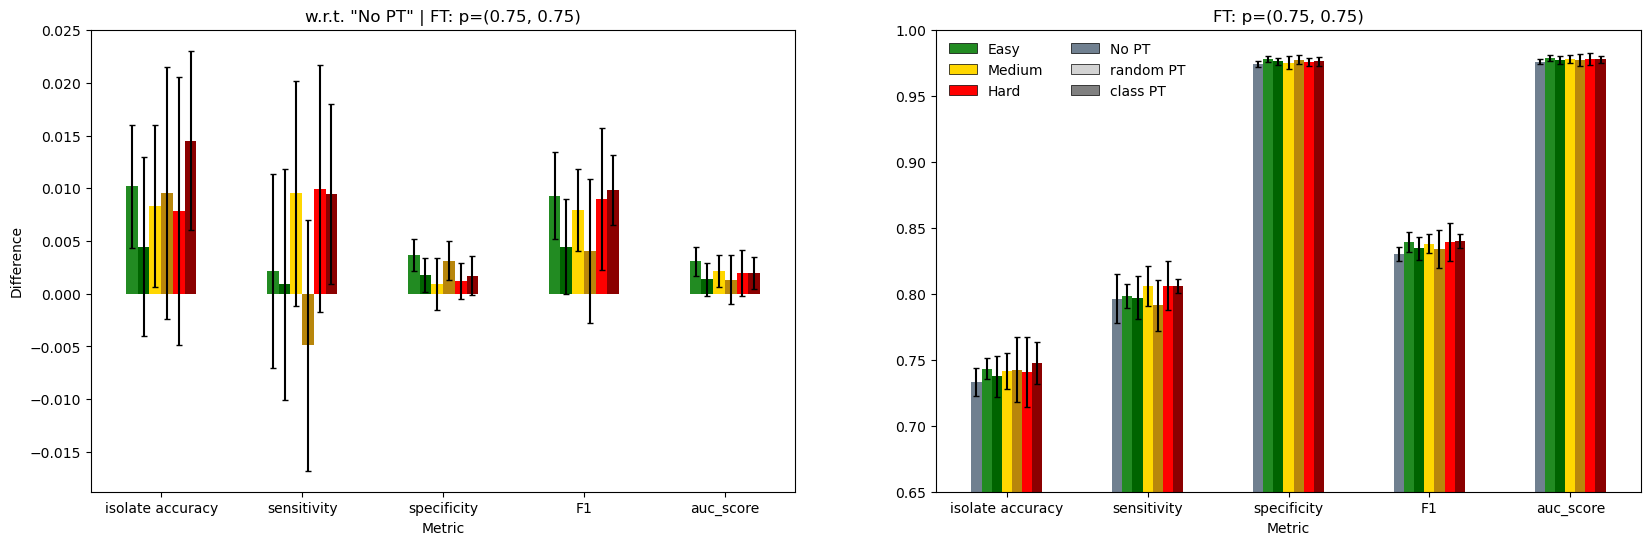

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=('+train_params.replace('_', ', ')+')')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.65, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=('+train_params.replace('_', ', ')+')')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', train_params+'FT_diff.png')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()

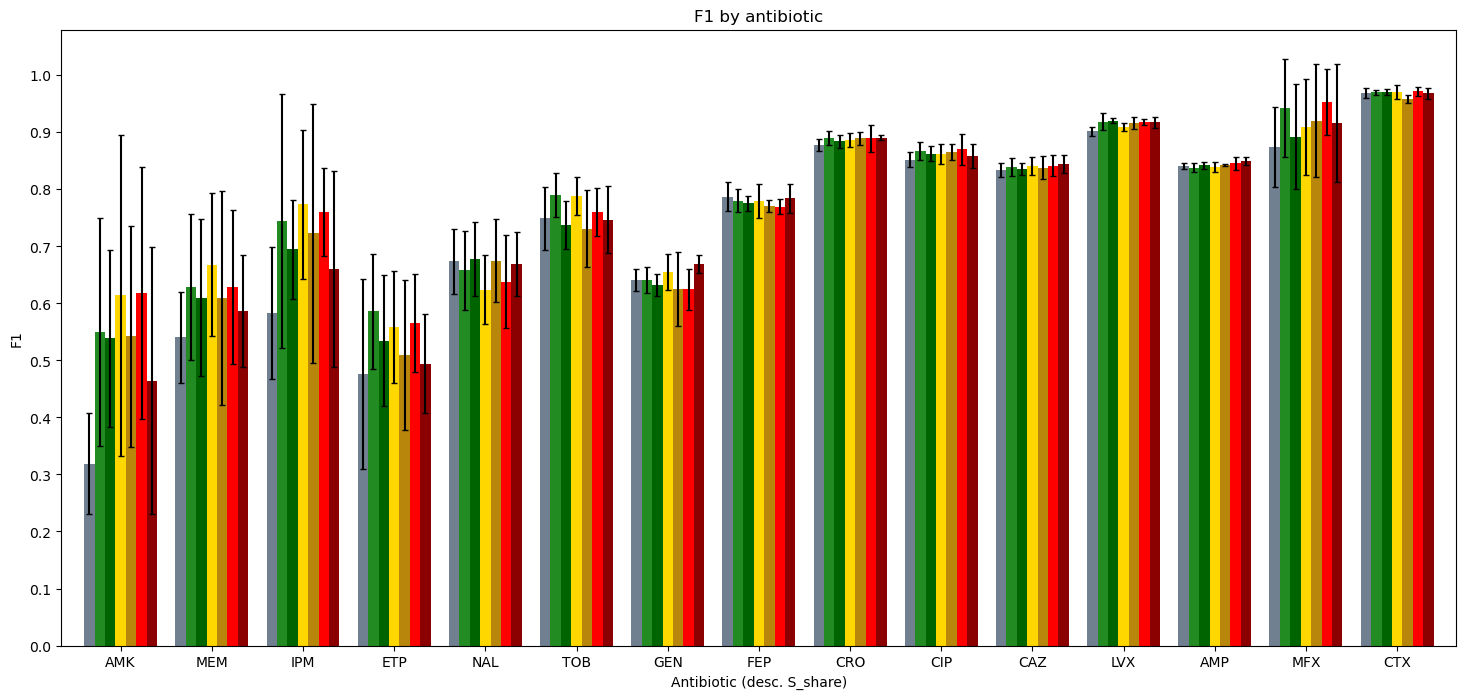

In [59]:
df_CV_ab = load_and_create_ab_df(train_params, exp_folder=exp_folder)
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

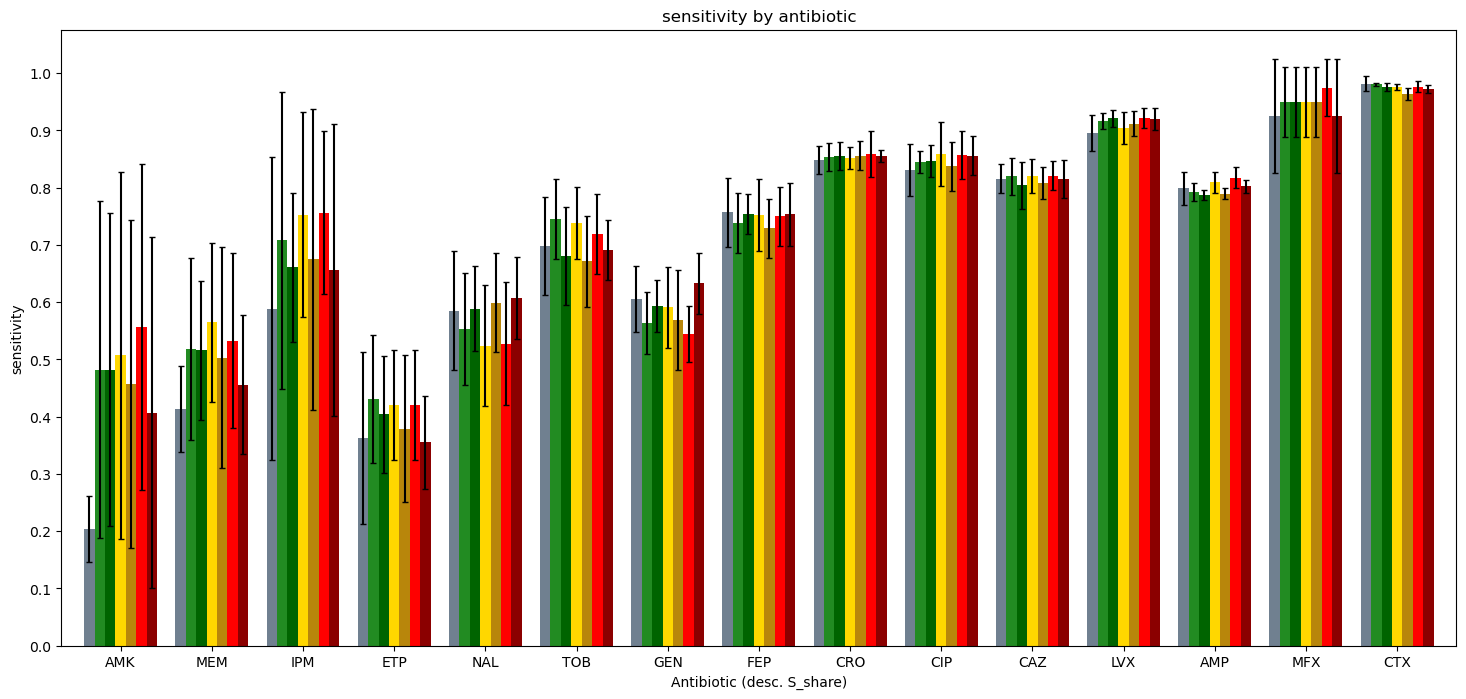

In [60]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

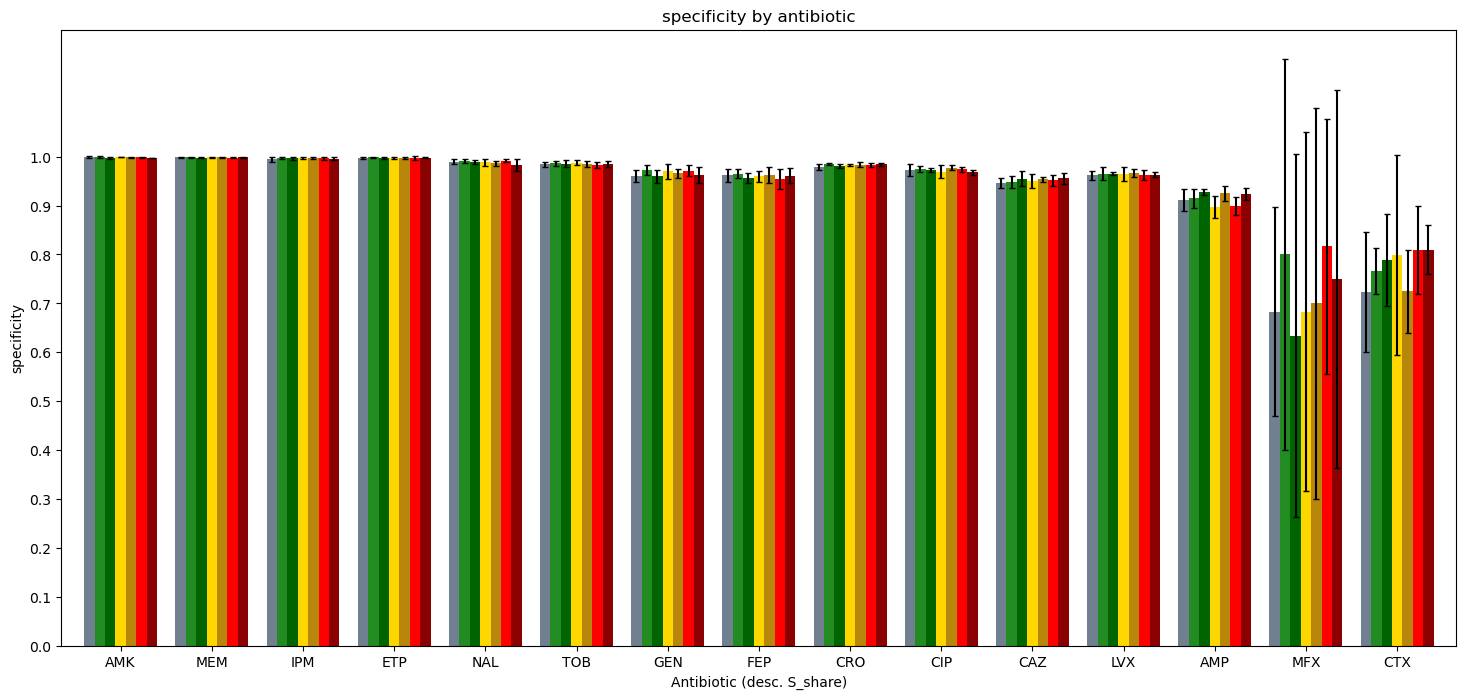

In [61]:
plot_metric_by_ab(
    df_CV_ab,
    metric='specificity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

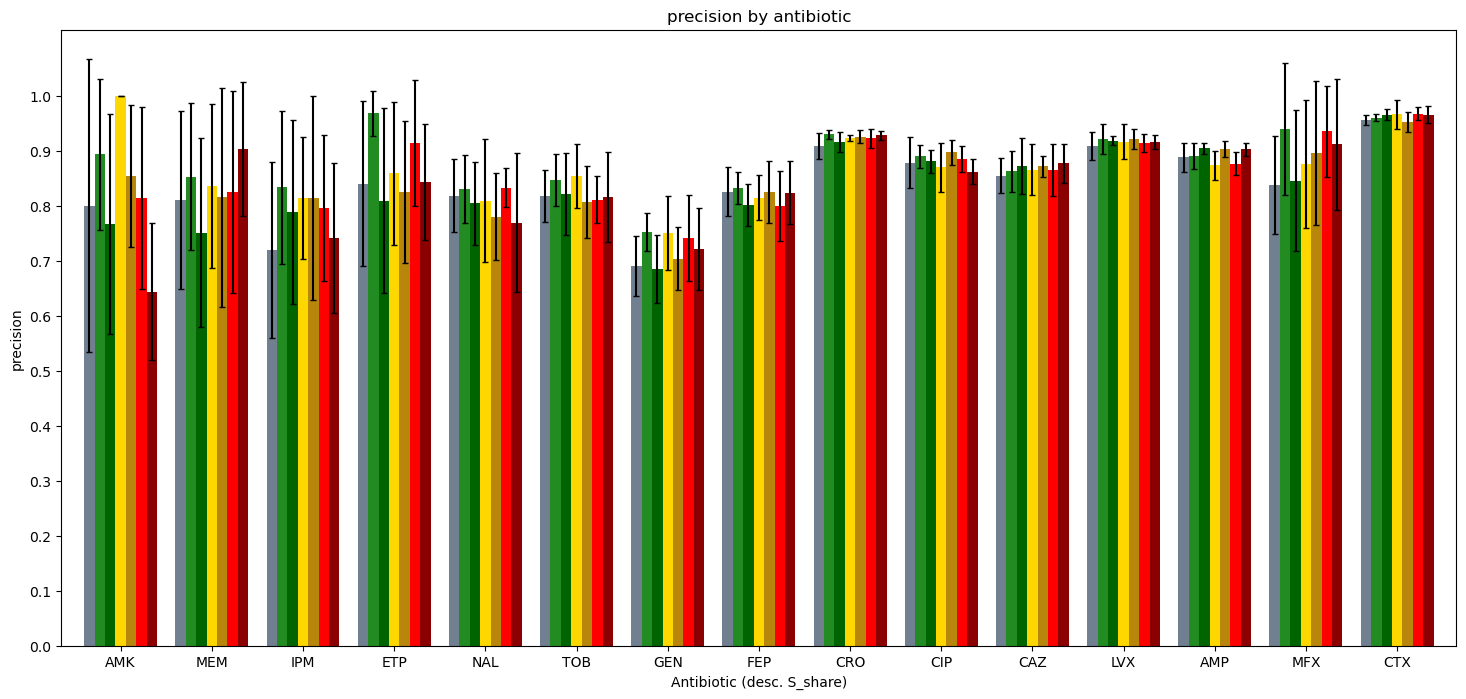

In [62]:
plot_metric_by_ab(
    df_CV_ab,
    metric='precision',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

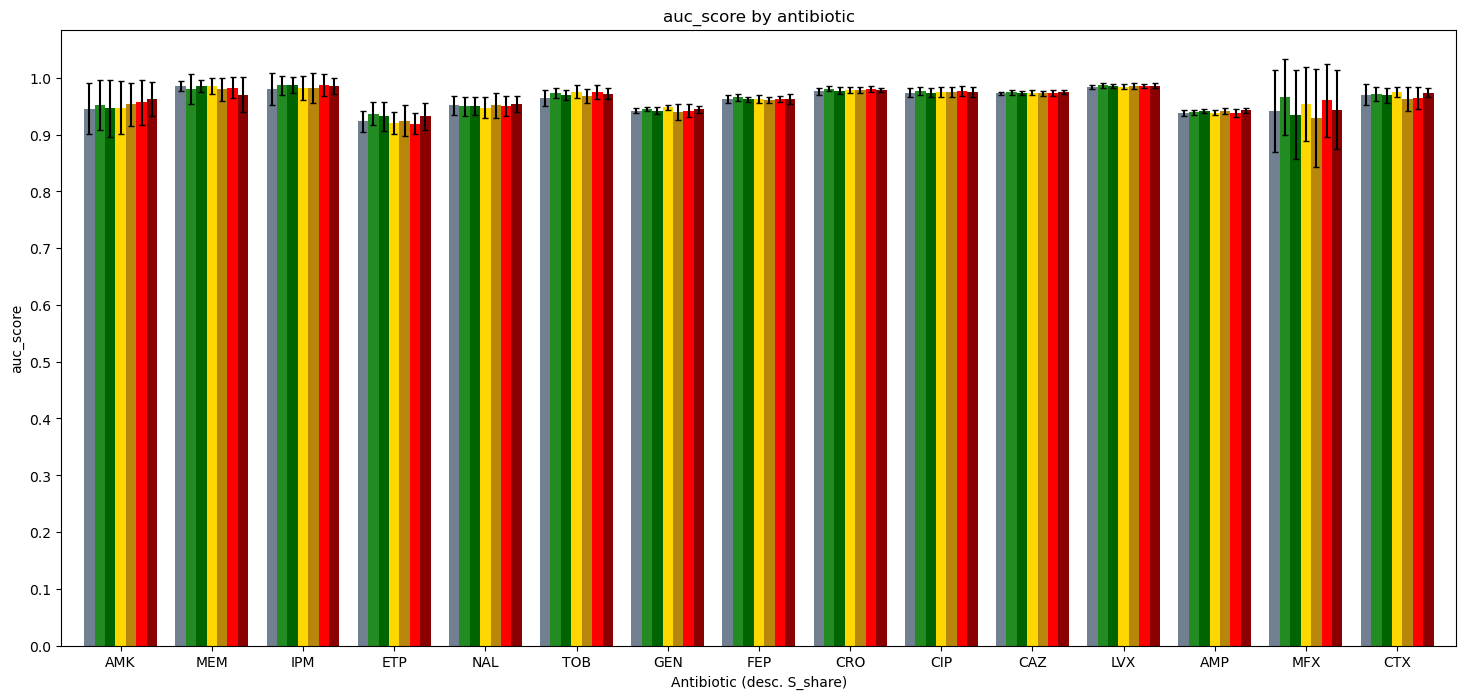

In [63]:
plot_metric_by_ab(
    df_CV_ab,
    metric='auc_score',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

### Reduced training size

In [64]:
model_names = ['No PT', 'Easy RPT', 'Medium RPT', 'Hard RPT', 'Easy CPT', 'Medium CPT', 'Hard CPT']
train_shares = [1, 5, 10, 20, 30]
df_CV_list = [load_and_create_train_share_df(model_name, train_params, exp_folder=exp_folder) for model_name in model_names]

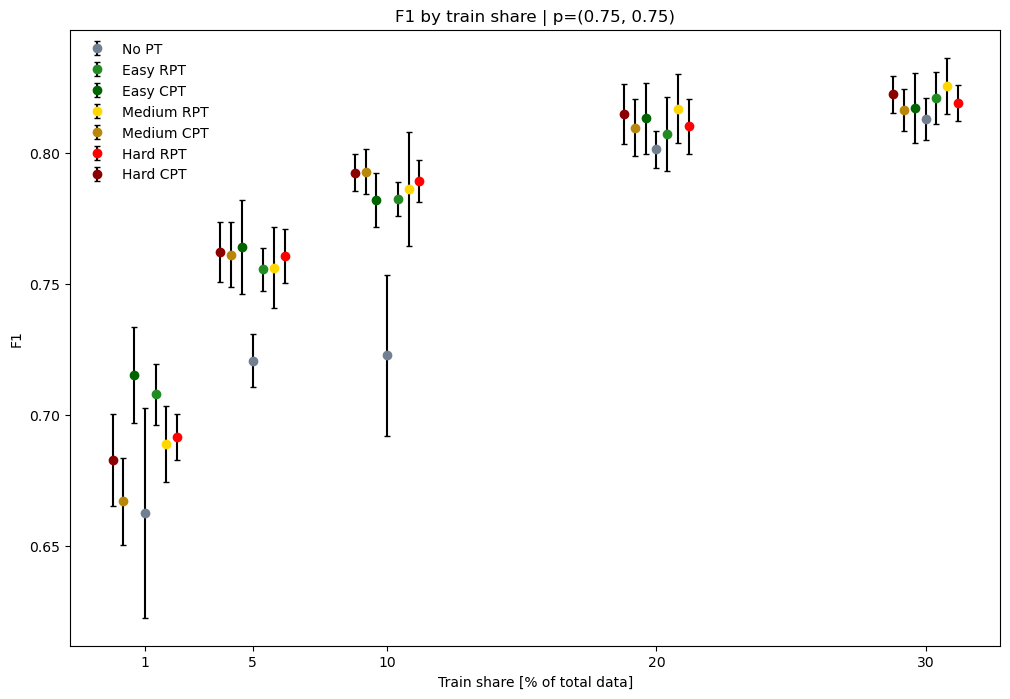

In [65]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'F1',
    plot_title='F1 by train share | p=('+train_params.replace('_', ', ')+')',
    save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'F1_by_train_share_'+train_params+'.png') if save_results else None,
) 

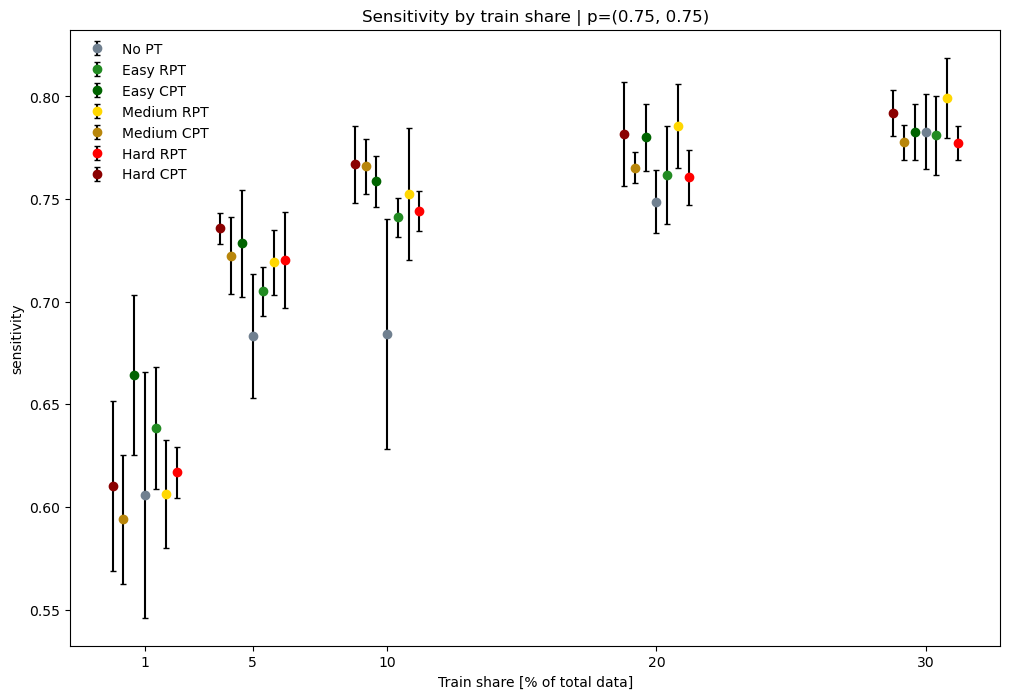

In [66]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'sensitivity',
    plot_title='Sensitivity by train share | p=('+train_params.replace('_', ', ')+')',
    save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'sens_by_train_share_'+train_params+'.png') if save_results else None,
) 

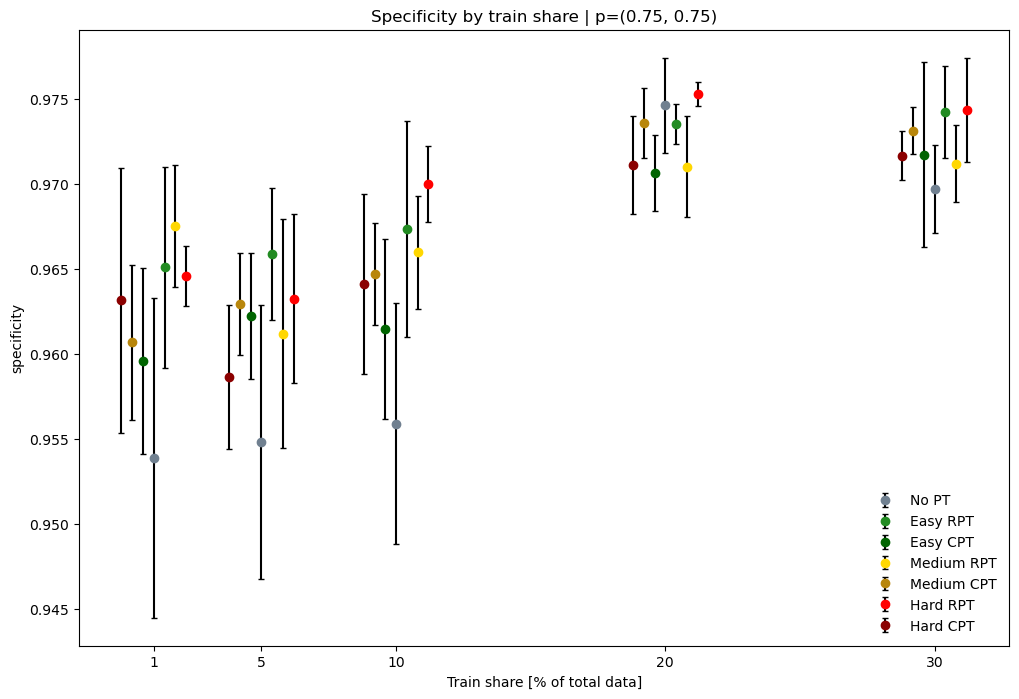

In [67]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'specificity',
    plot_title='Specificity by train share | p=('+train_params.replace('_', ', ')+')',
    save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'spec_by_train_share_'+train_params+'.png') if save_results else None,
) 

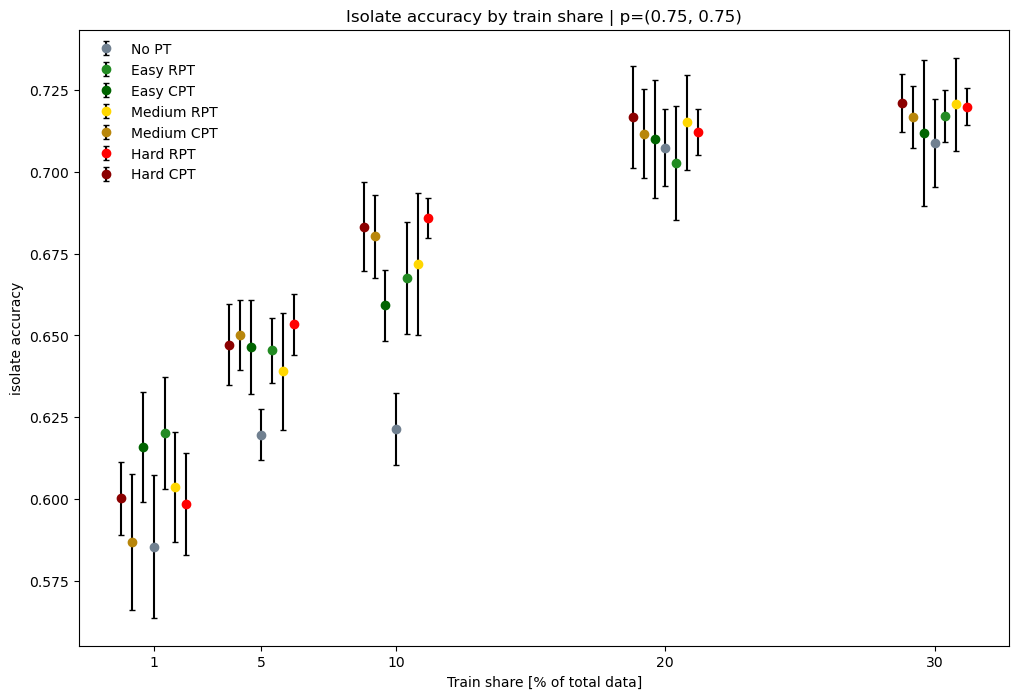

In [68]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'isolate accuracy',
    plot_title='Isolate accuracy by train share | p=('+train_params.replace('_', ', ')+')',
    save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'iso_acc_by_train_share_'+train_params+'.png') if save_results else None,
) 

#### In-depth plots at specific train shares

1%

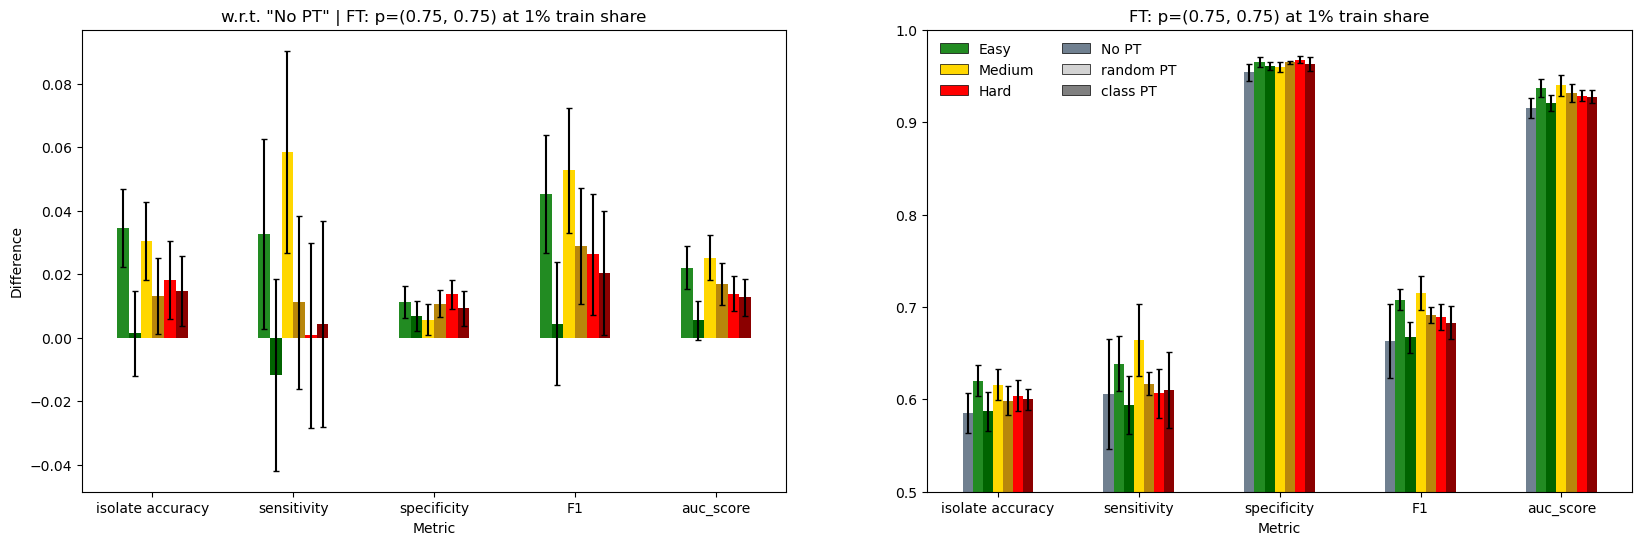

In [69]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs(train_params, '0.01', exp_folder=exp_folder)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=('+train_params.replace('_', ', ')+') at 1% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=('+train_params.replace('_', ', ')+') at 1% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.01.png')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()


c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:209: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:209: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:209: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\U

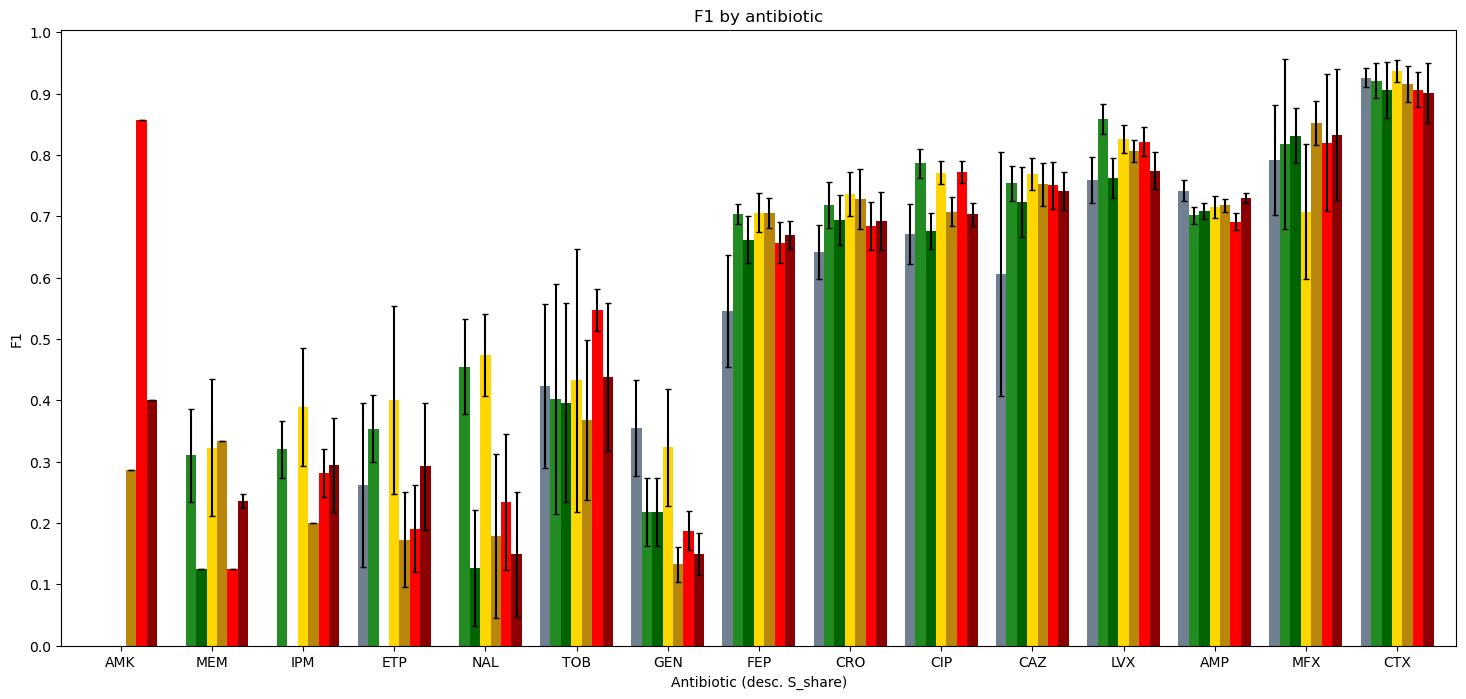

In [70]:
df_CV_ab = load_and_create_ab_df(train_params, train_share='0.01', exp_folder=exp_folder)
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
    save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_F1_by_ab_0.01.png') if save_results else None,
)

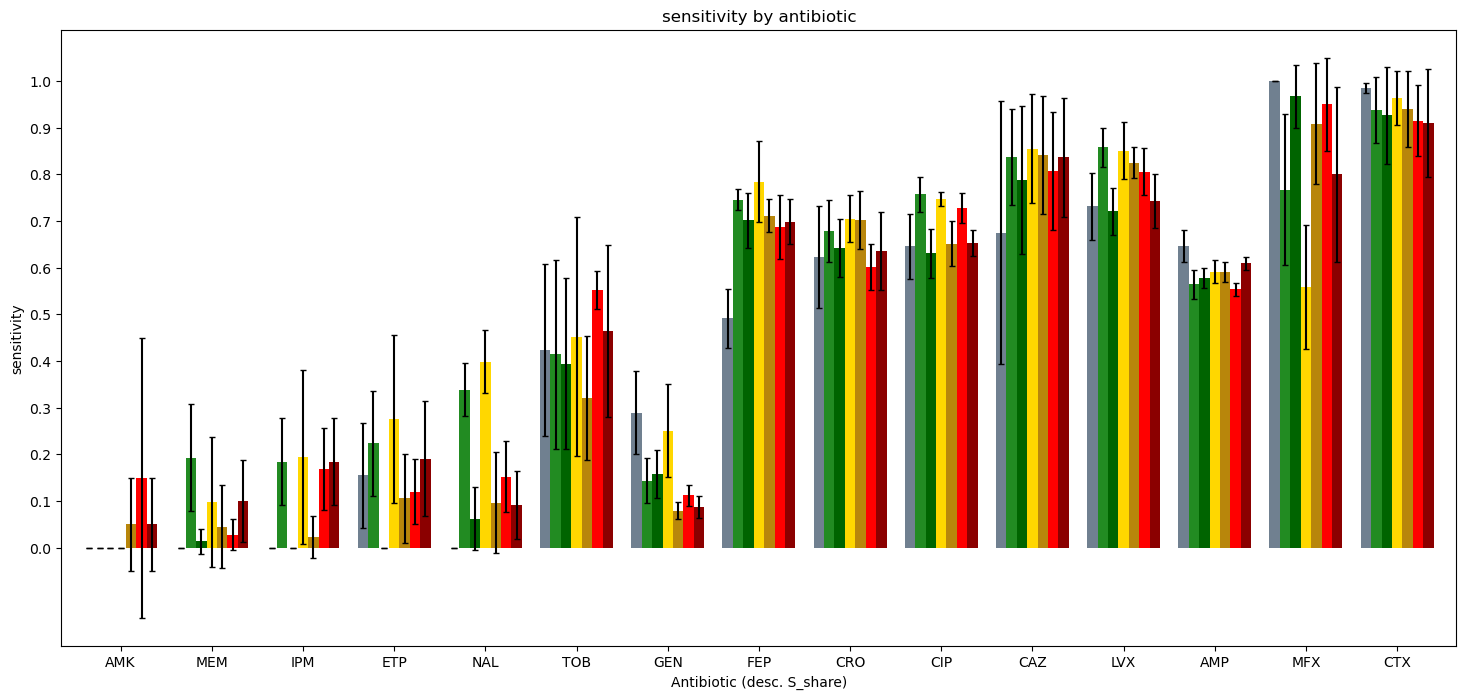

In [71]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

5%

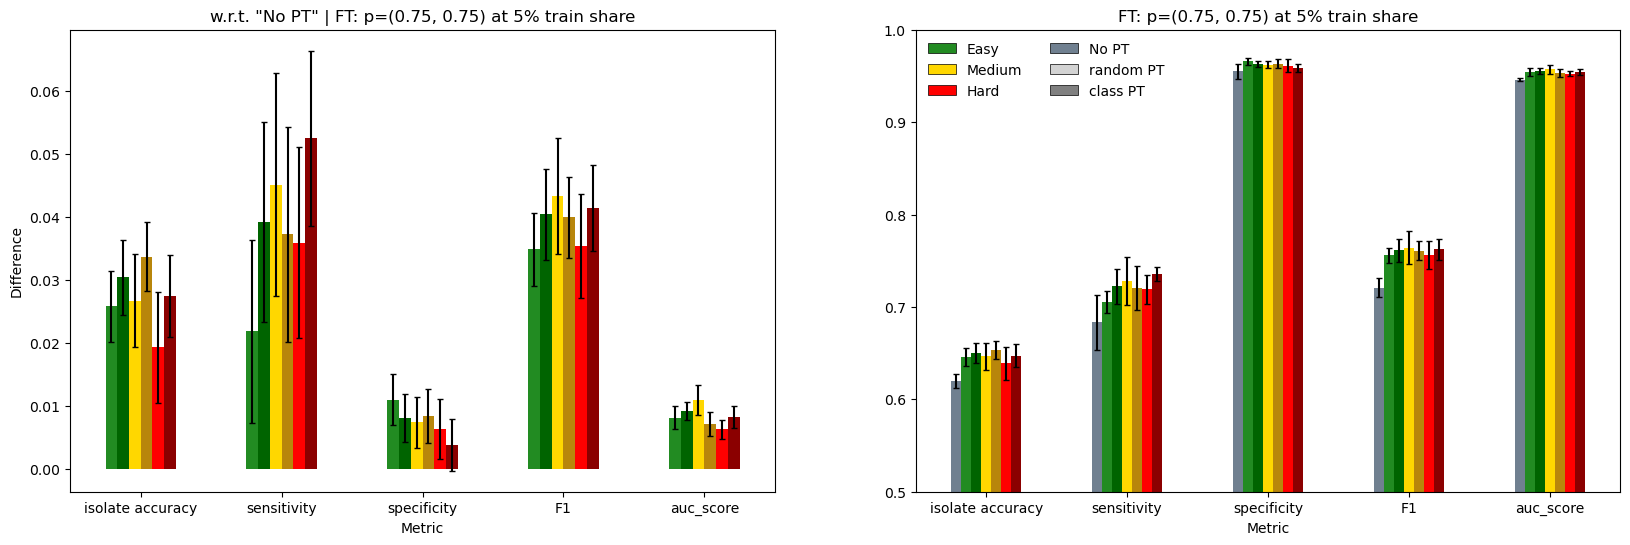

In [72]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs(train_params, '0.05', exp_folder=exp_folder)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=('+train_params.replace('_', ', ')+') at 5% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=('+train_params.replace('_', ', ')+') at 5% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.05.png')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()

c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:209: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


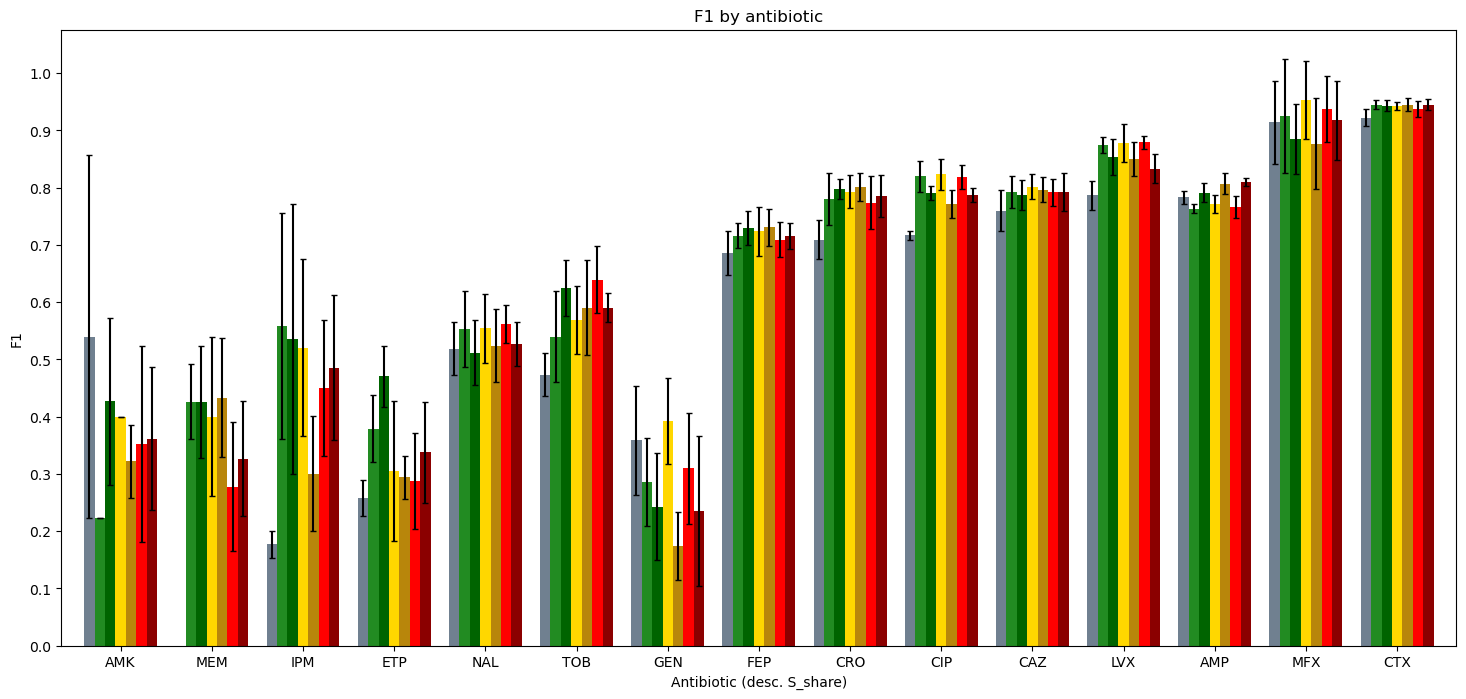

In [73]:
df_CV_ab = load_and_create_ab_df(train_params, train_share='0.05', exp_folder=exp_folder)
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

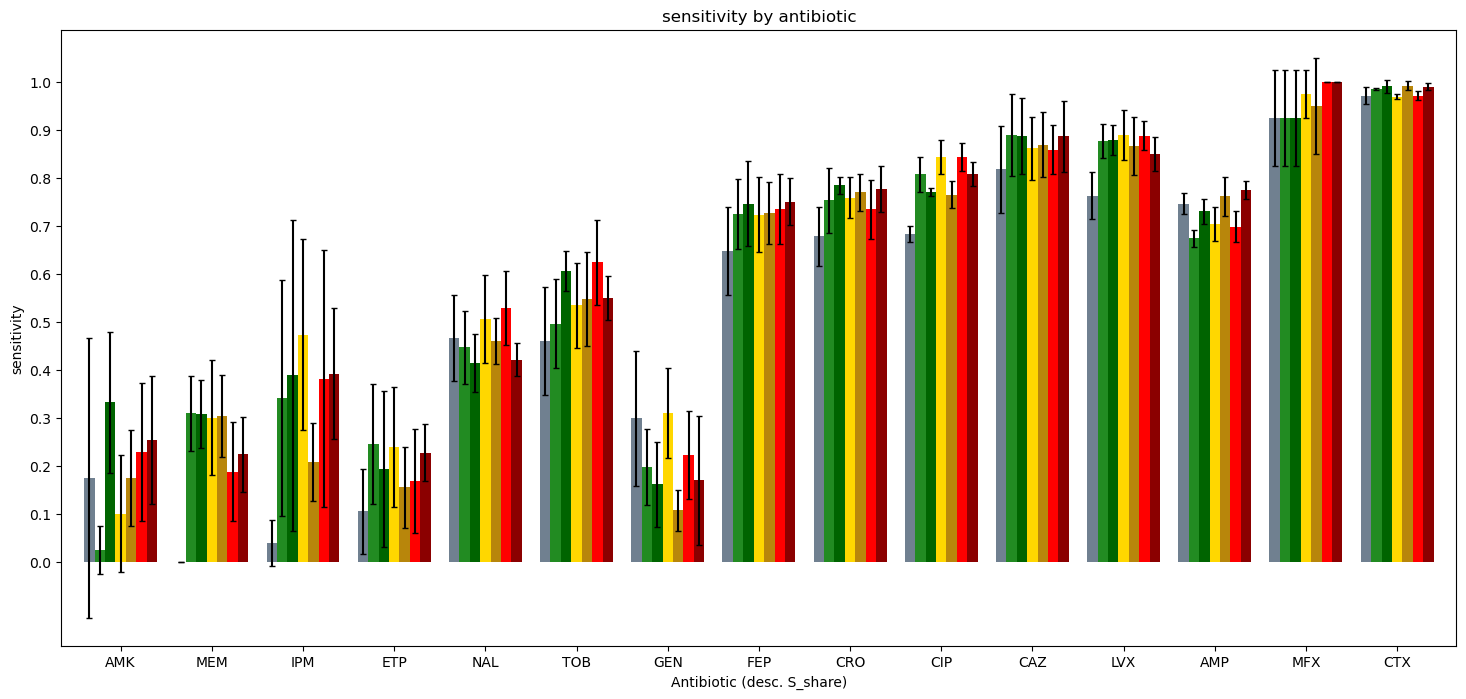

In [74]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

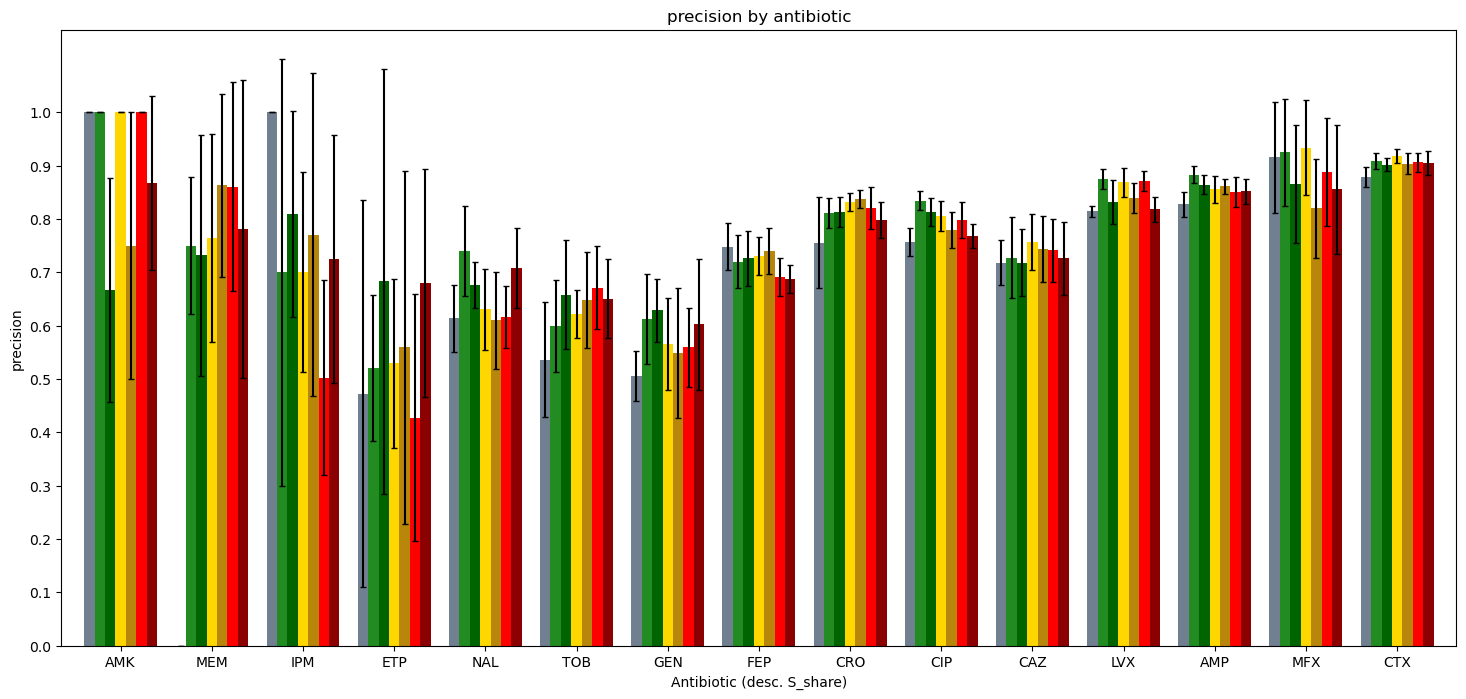

In [75]:
plot_metric_by_ab(
    df_CV_ab,
    metric='precision',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

10%

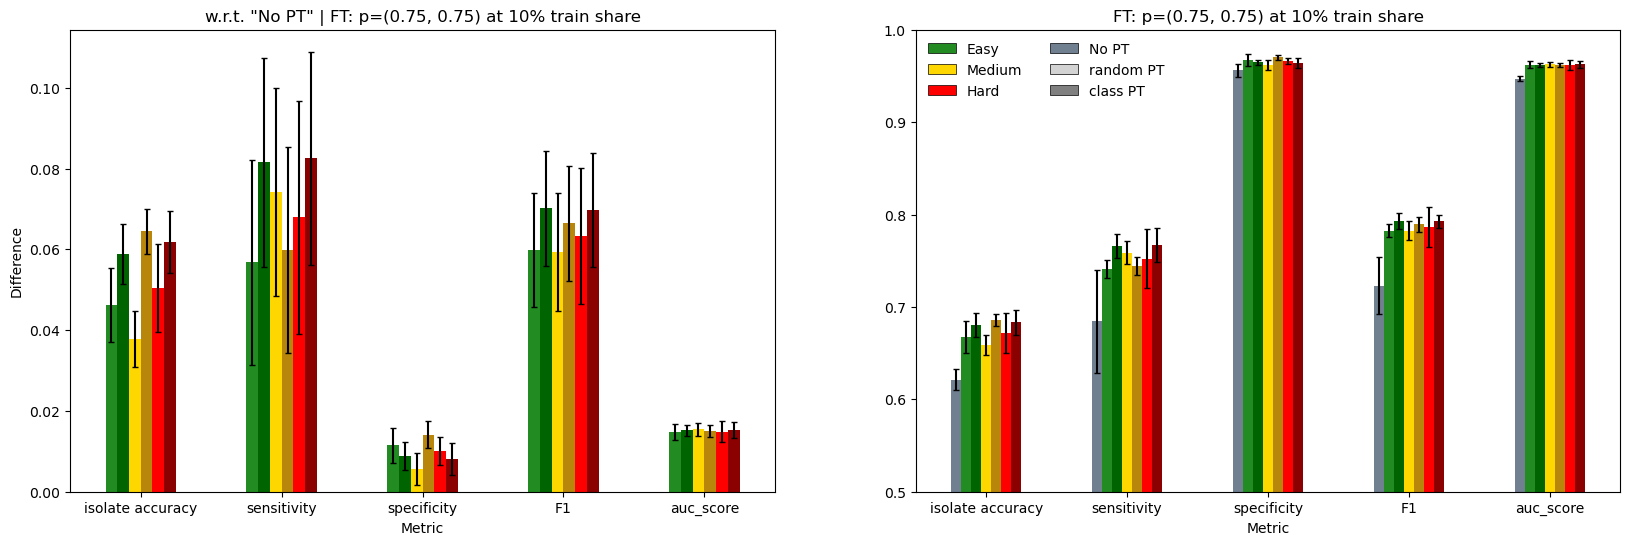

In [76]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs(train_params, '0.1', exp_folder=exp_folder)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=('+train_params.replace('_', ', ')+') at 10% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=('+train_params.replace('_', ', ')+') at 10% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.1.png')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()

30%

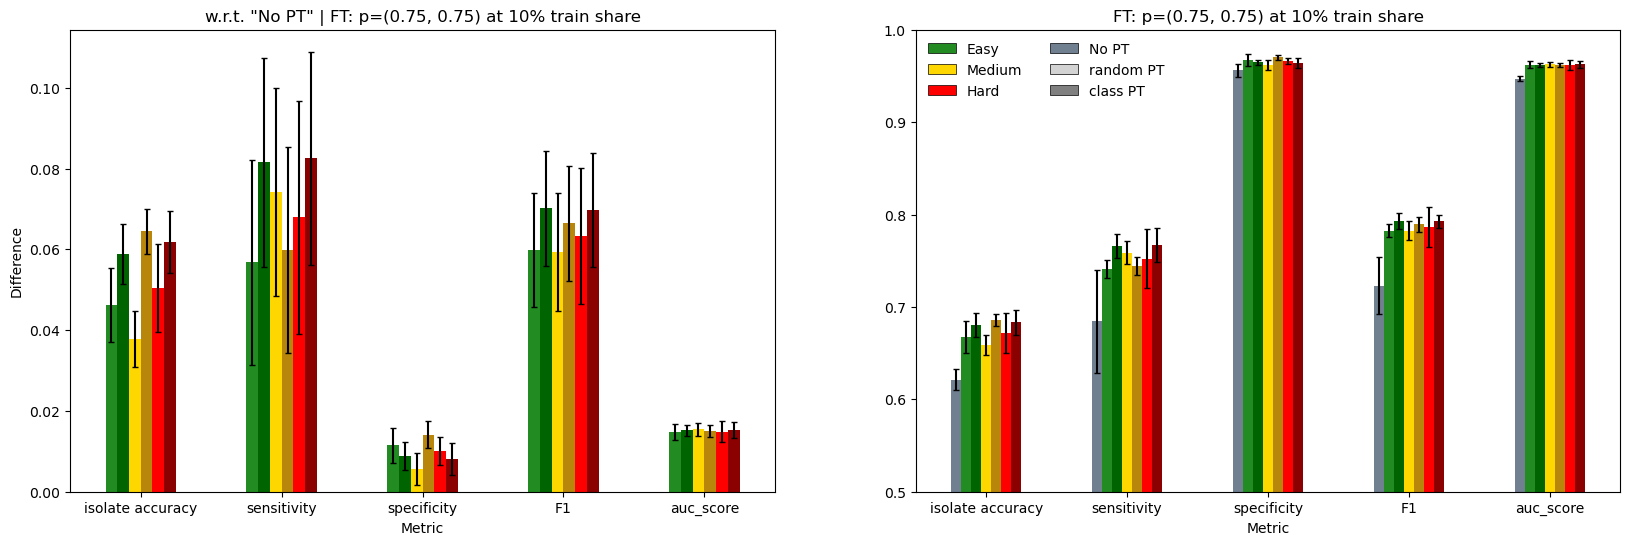

In [77]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs(train_params, '0.1', exp_folder=exp_folder)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=('+train_params.replace('_', ', ')+') at 10% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=('+train_params.replace('_', ', ')+') at 10% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.1.png')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()

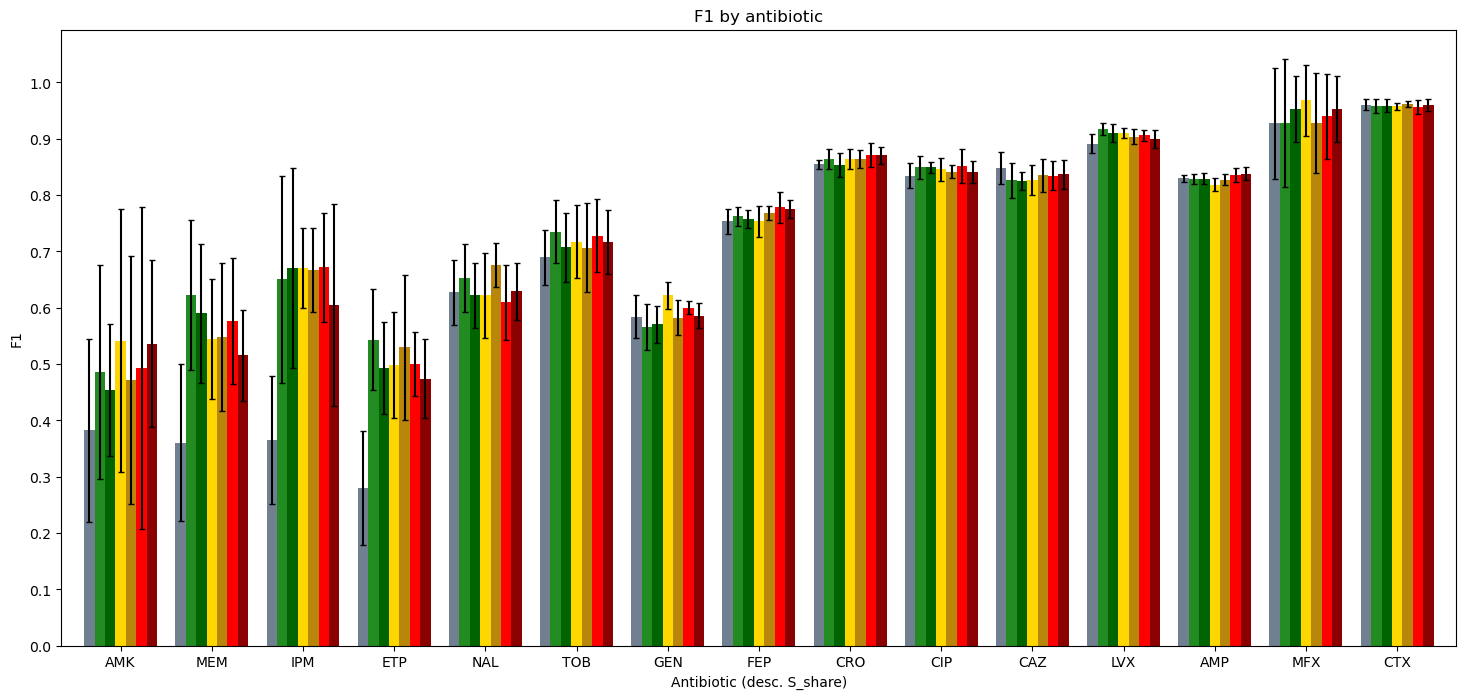

In [78]:
df_CV_ab = load_and_create_ab_df(train_params, train_share='0.3', exp_folder=exp_folder)
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

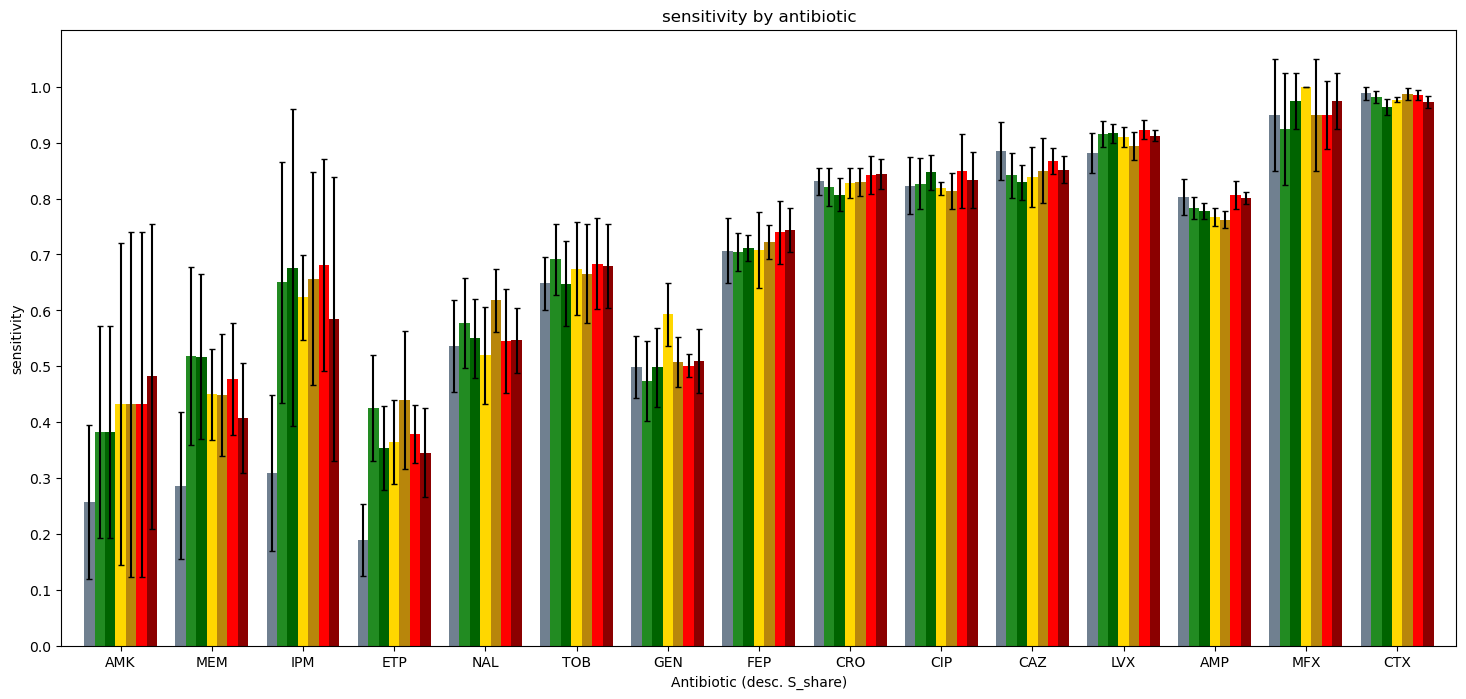

In [79]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

## p = (0.5, 1 class)

In [80]:
save_results = False
exp_folder = '2024-04-23_size'
train_params = '0.75_1class'
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs(train_params, exp_folder=exp_folder)

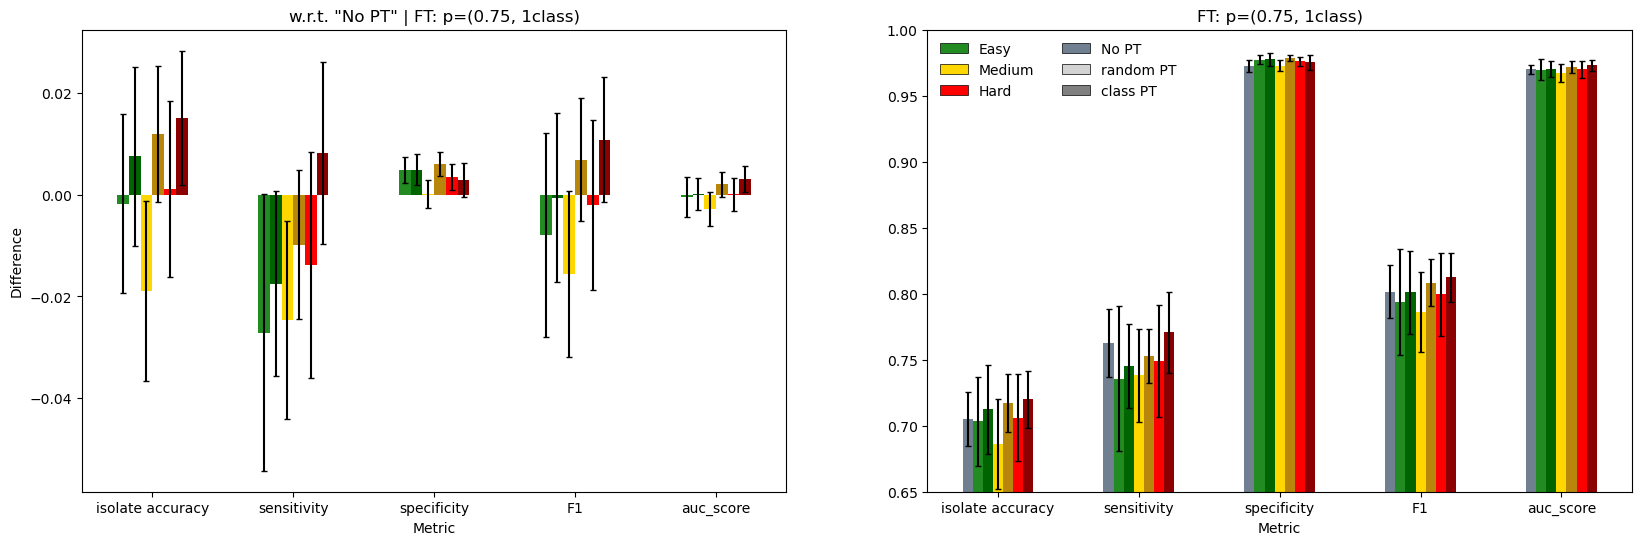

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=('+train_params.replace('_', ', ')+')')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.65, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=('+train_params.replace('_', ', ')+')')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', train_params+'FT_diff.png')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()

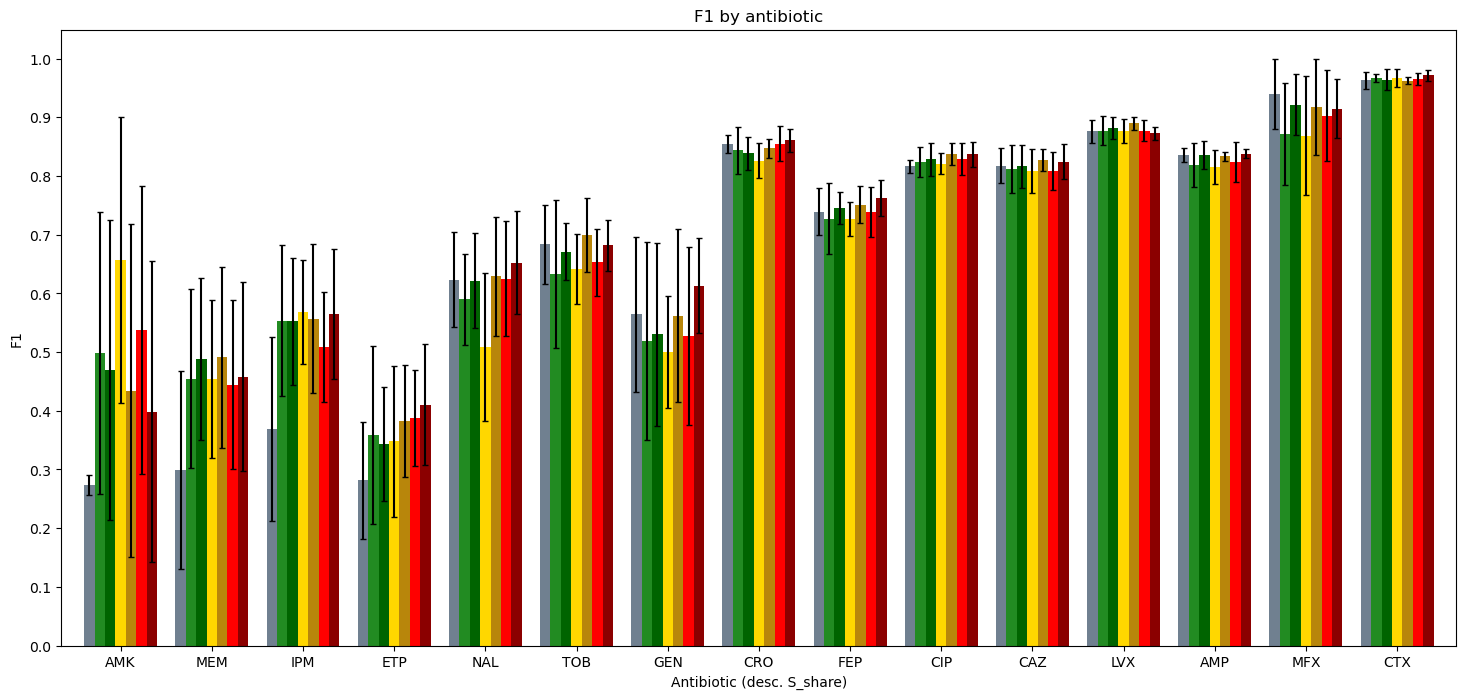

In [82]:
df_CV_ab = load_and_create_ab_df(train_params, exp_folder=exp_folder)
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

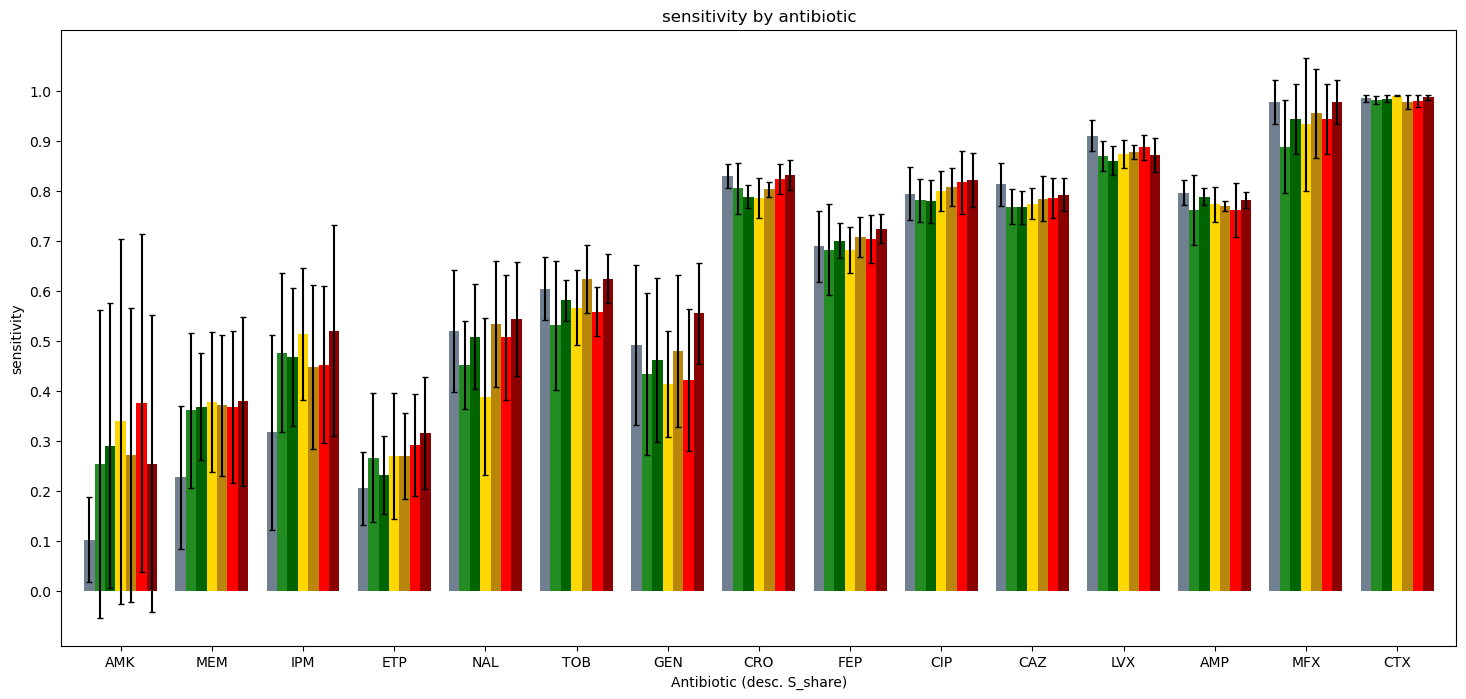

In [83]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

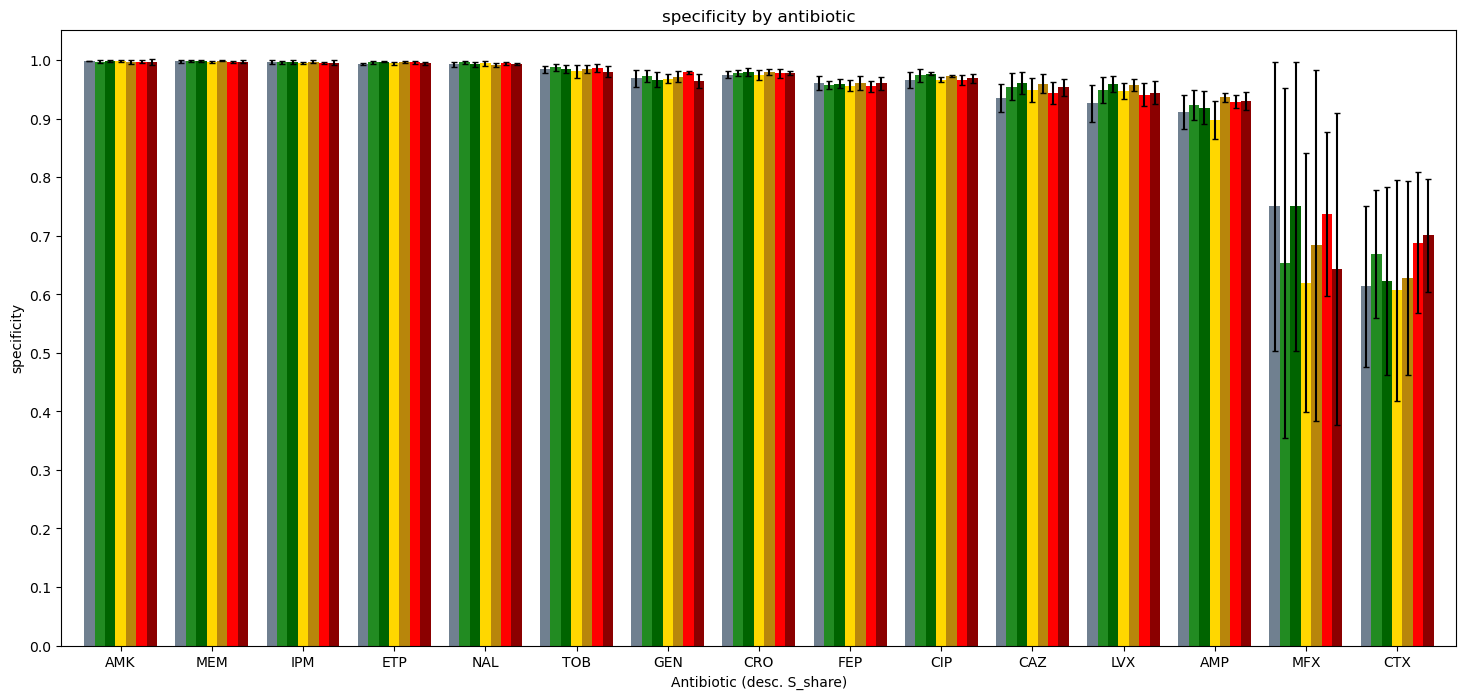

In [84]:
plot_metric_by_ab(
    df_CV_ab,
    metric='specificity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

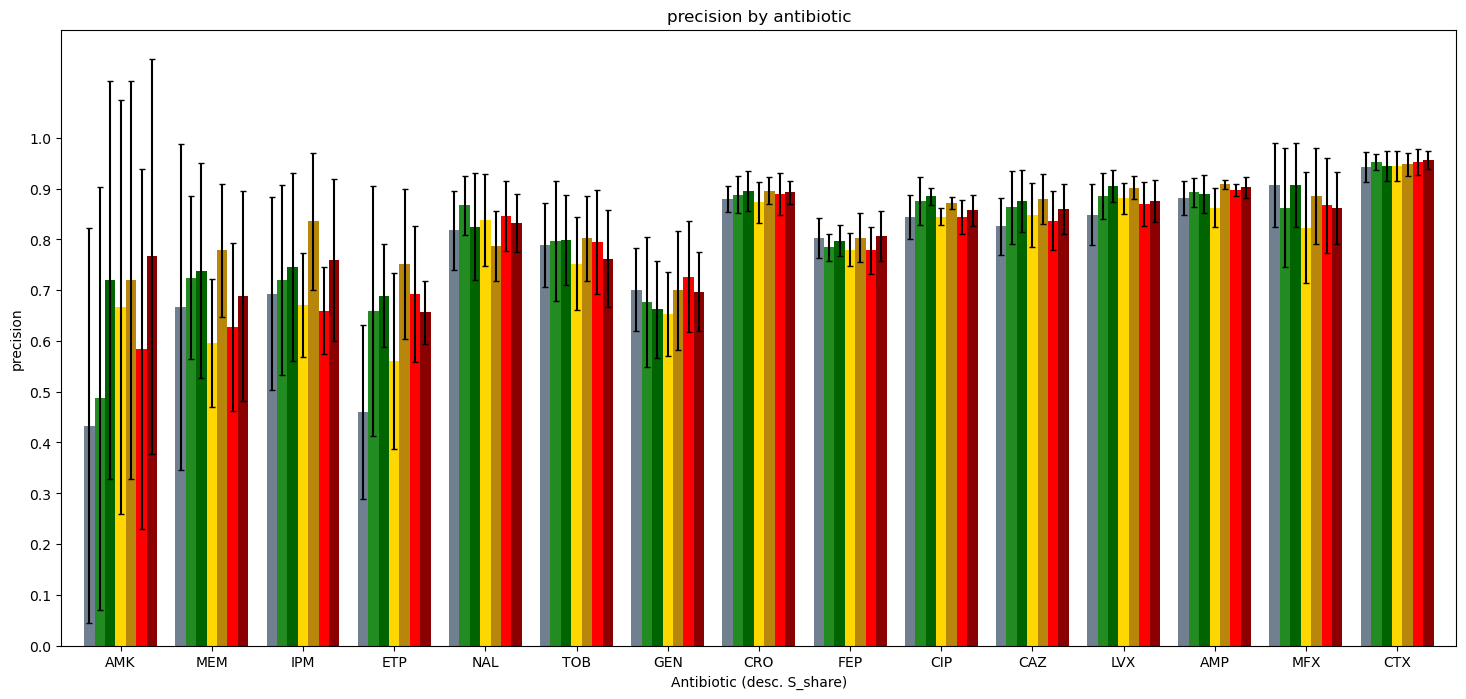

In [85]:
plot_metric_by_ab(
    df_CV_ab,
    metric='precision',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

### Reduced training size

In [86]:
model_names = ['No PT', 'Easy RPT', 'Medium RPT', 'Hard RPT', 'Easy CPT', 'Medium CPT', 'Hard CPT']
train_shares = [1, 5, 10, 20, 30]
df_CV_list = [load_and_create_train_share_df(model_name, train_params, exp_folder=exp_folder) for model_name in model_names]

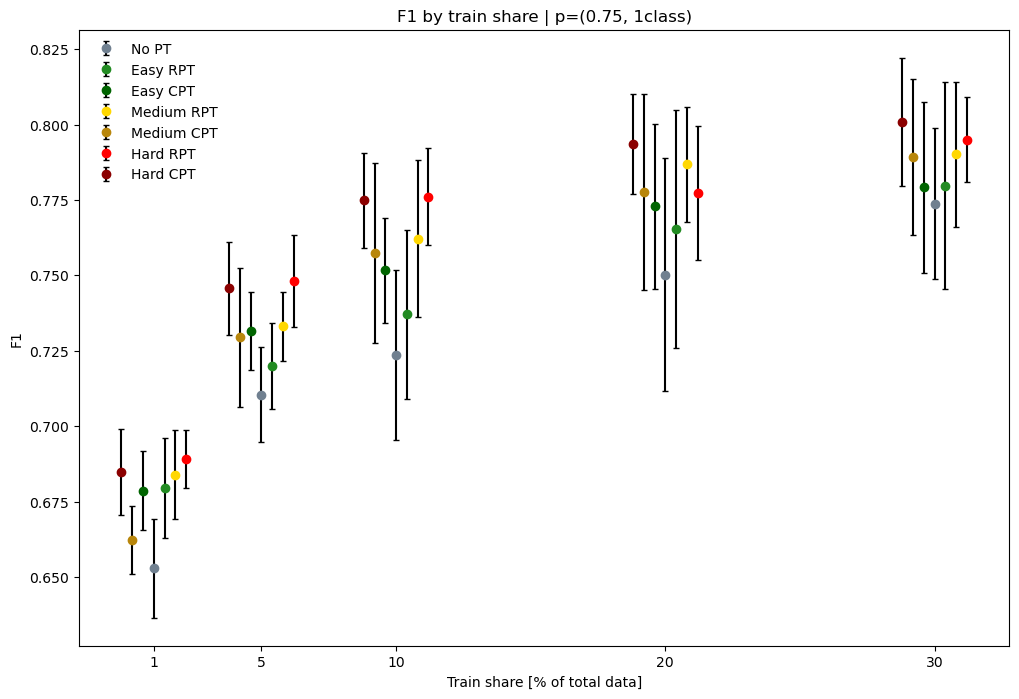

In [87]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'F1',
    plot_title='F1 by train share | p=('+train_params.replace('_', ', ')+')',
    save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'F1_by_train_share_'+train_params+'.png') if save_results else None,
) 

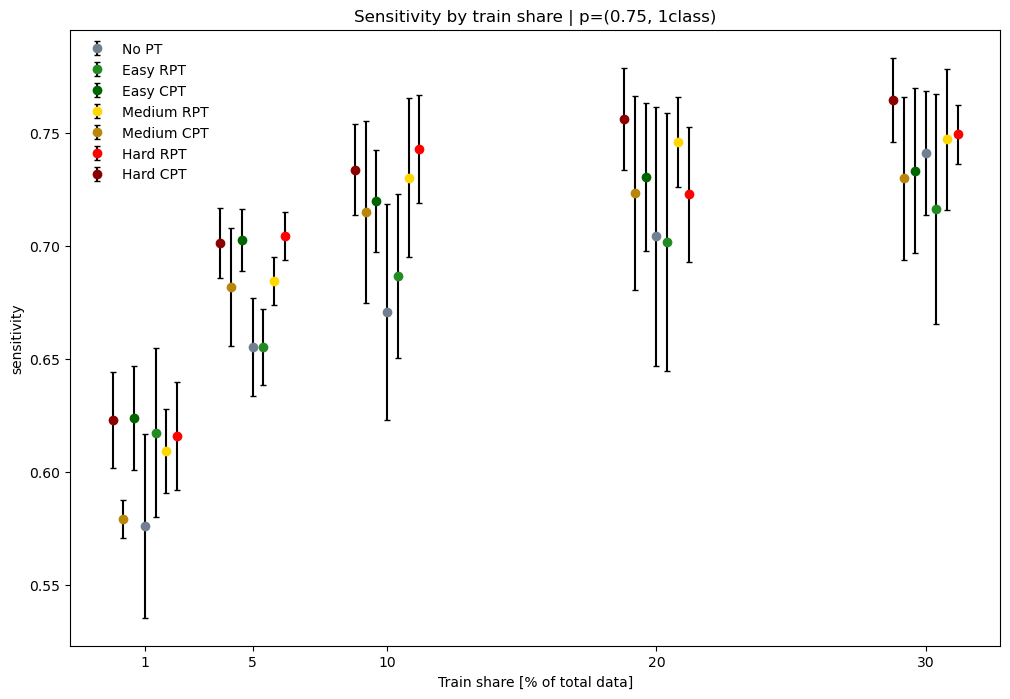

In [88]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'sensitivity',
    plot_title='Sensitivity by train share | p=('+train_params.replace('_', ', ')+')',
    save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'sens_by_train_share_'+train_params+'.png') if save_results else None,
) 

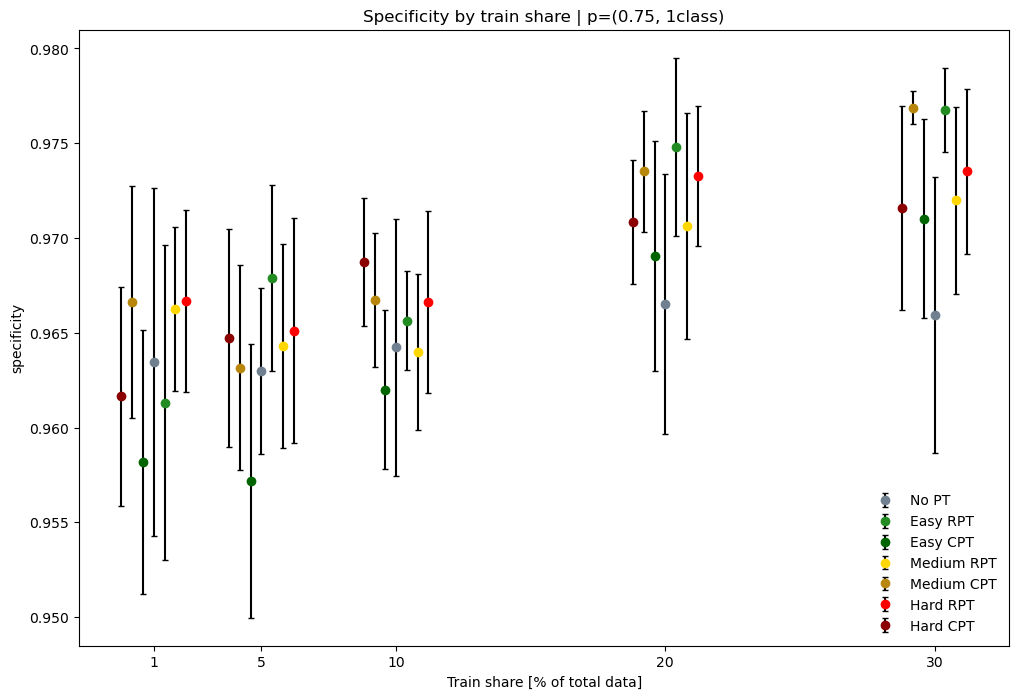

In [89]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'specificity',
    plot_title='Specificity by train share | p=('+train_params.replace('_', ', ')+')',
    save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'spec_by_train_share_'+train_params+'.png') if save_results else None,
) 

#### In-depth plots at specific train shares

1%

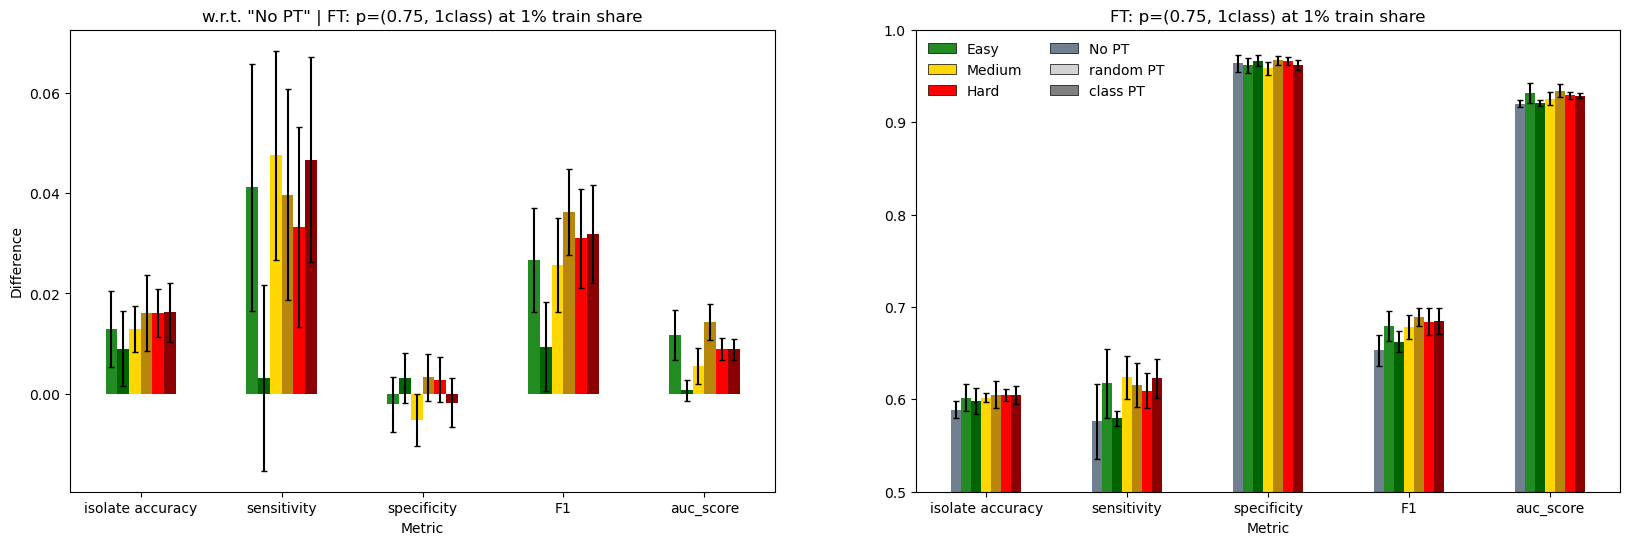

In [90]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs(train_params, '0.01', exp_folder=exp_folder)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=('+train_params.replace('_', ', ')+') at 1% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=('+train_params.replace('_', ', ')+') at 1% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.01.png')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()

c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:209: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:209: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:209: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\U

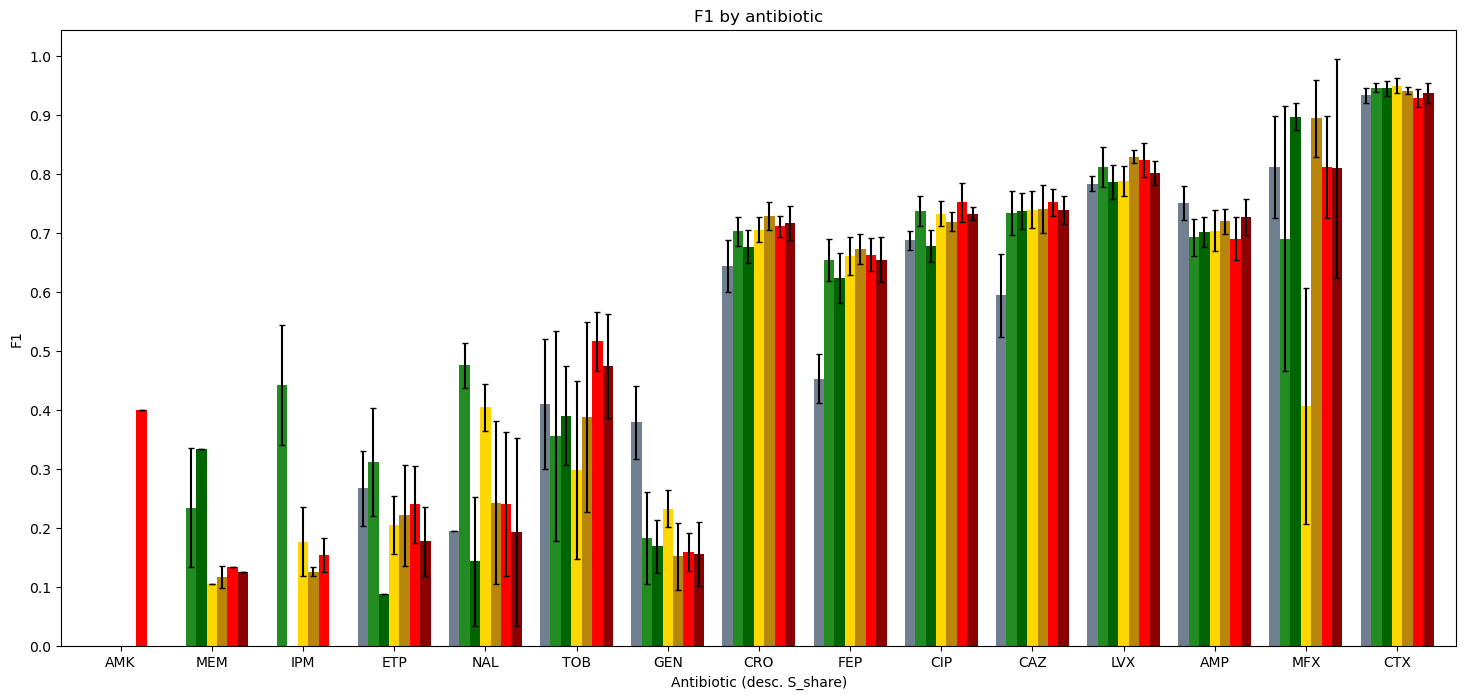

In [91]:
df_CV_ab = load_and_create_ab_df(train_params, train_share='0.01', exp_folder=exp_folder)
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
    save_path=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_F1_by_ab_0.01.png') if save_results else None,
)

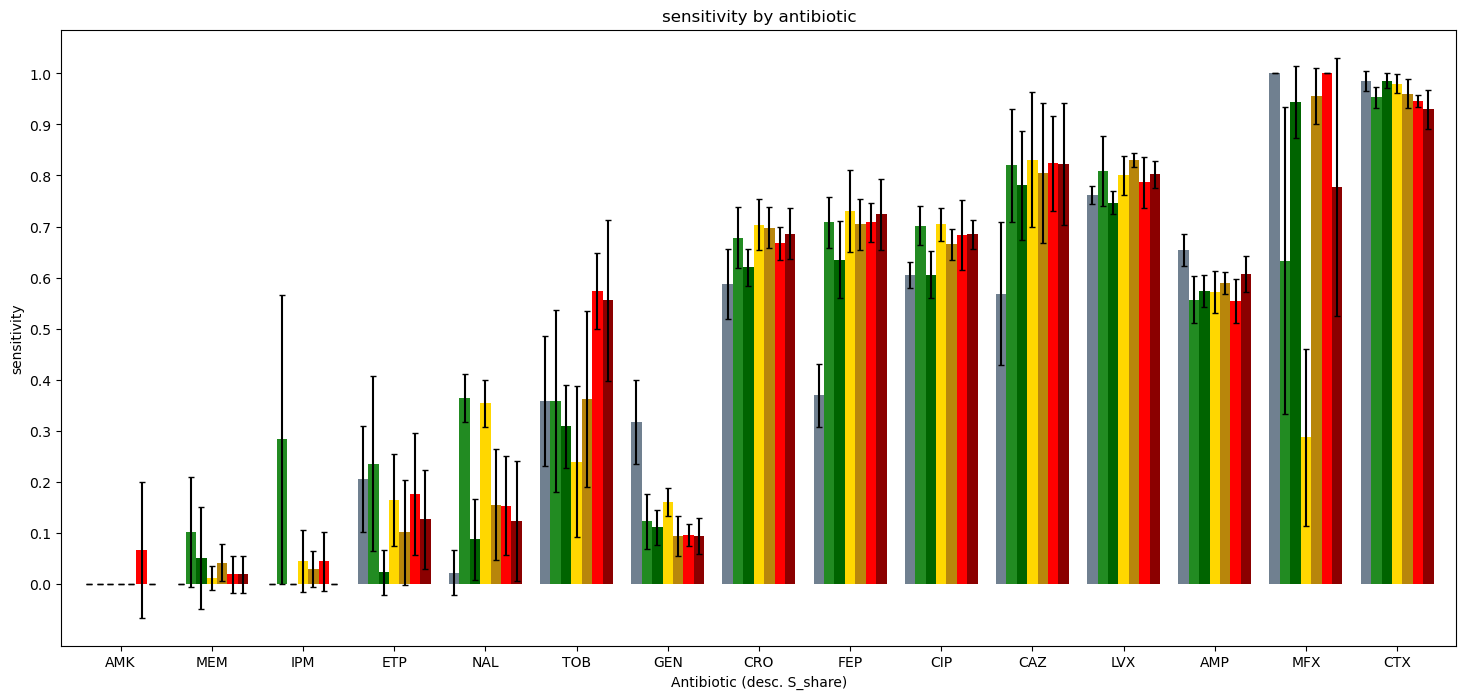

In [92]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

5%

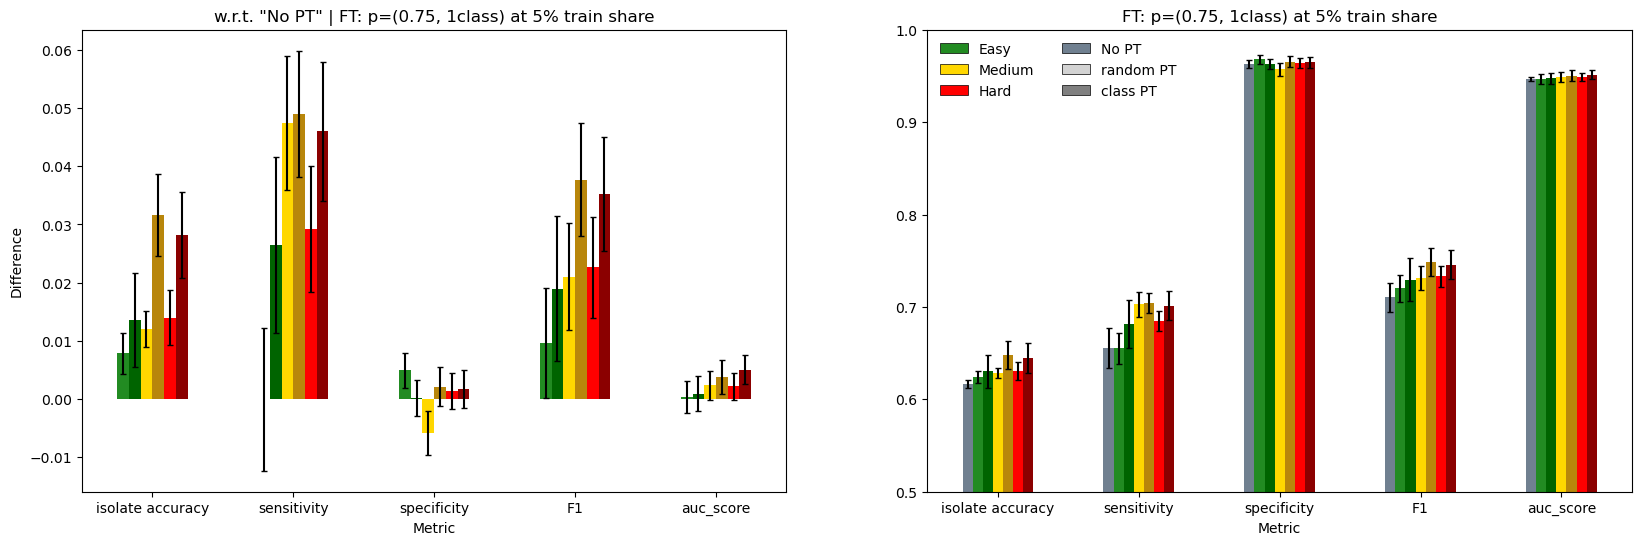

In [93]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs(train_params, '0.05', exp_folder=exp_folder)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=('+train_params.replace('_', ', ')+') at 5% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=('+train_params.replace('_', ', ')+') at 5% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.05.png')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()

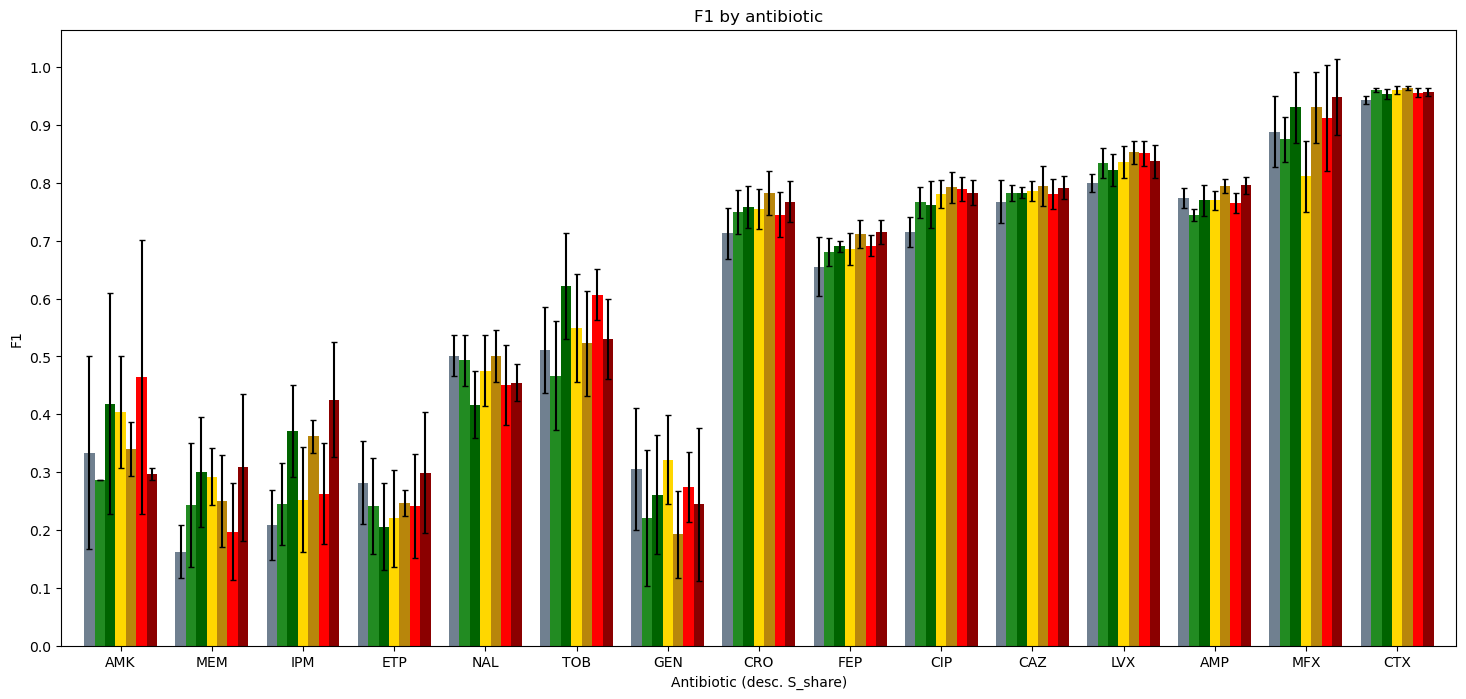

In [94]:
df_CV_ab = load_and_create_ab_df(train_params, train_share='0.05', exp_folder=exp_folder)
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

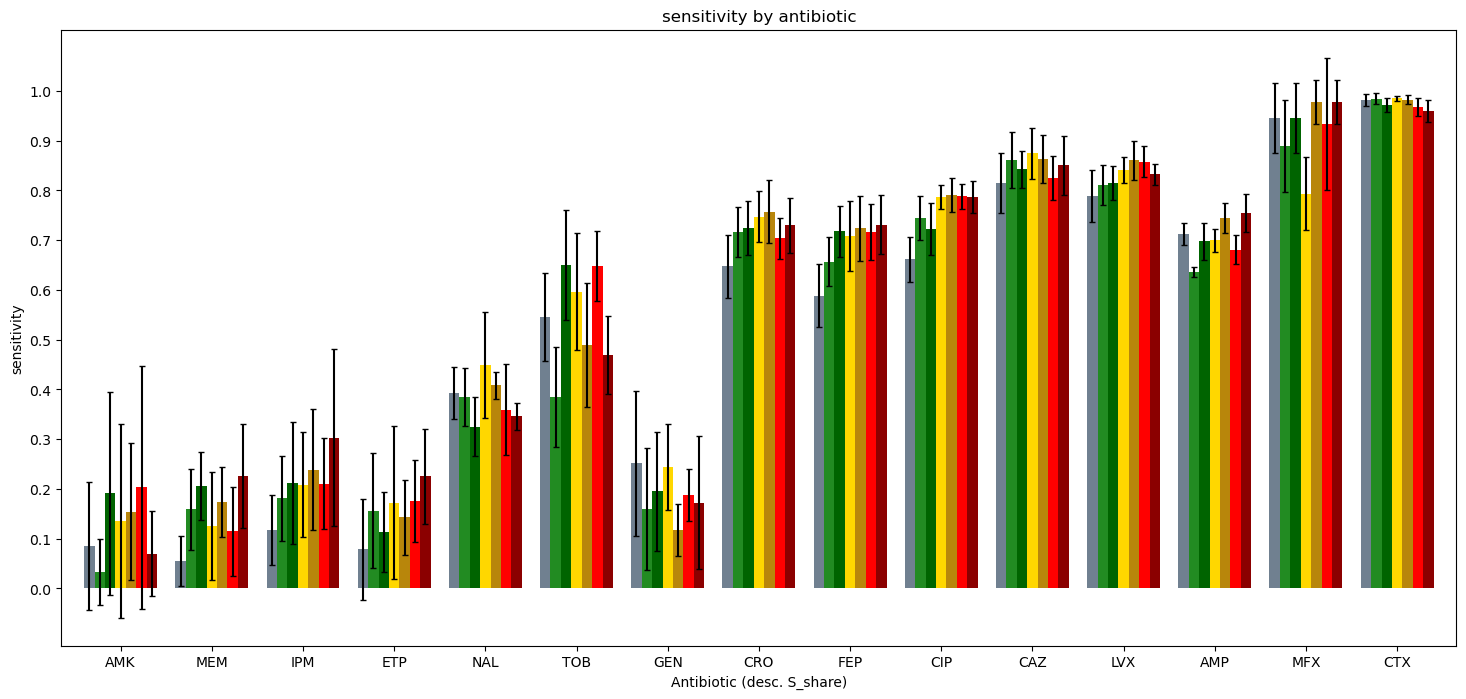

In [95]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

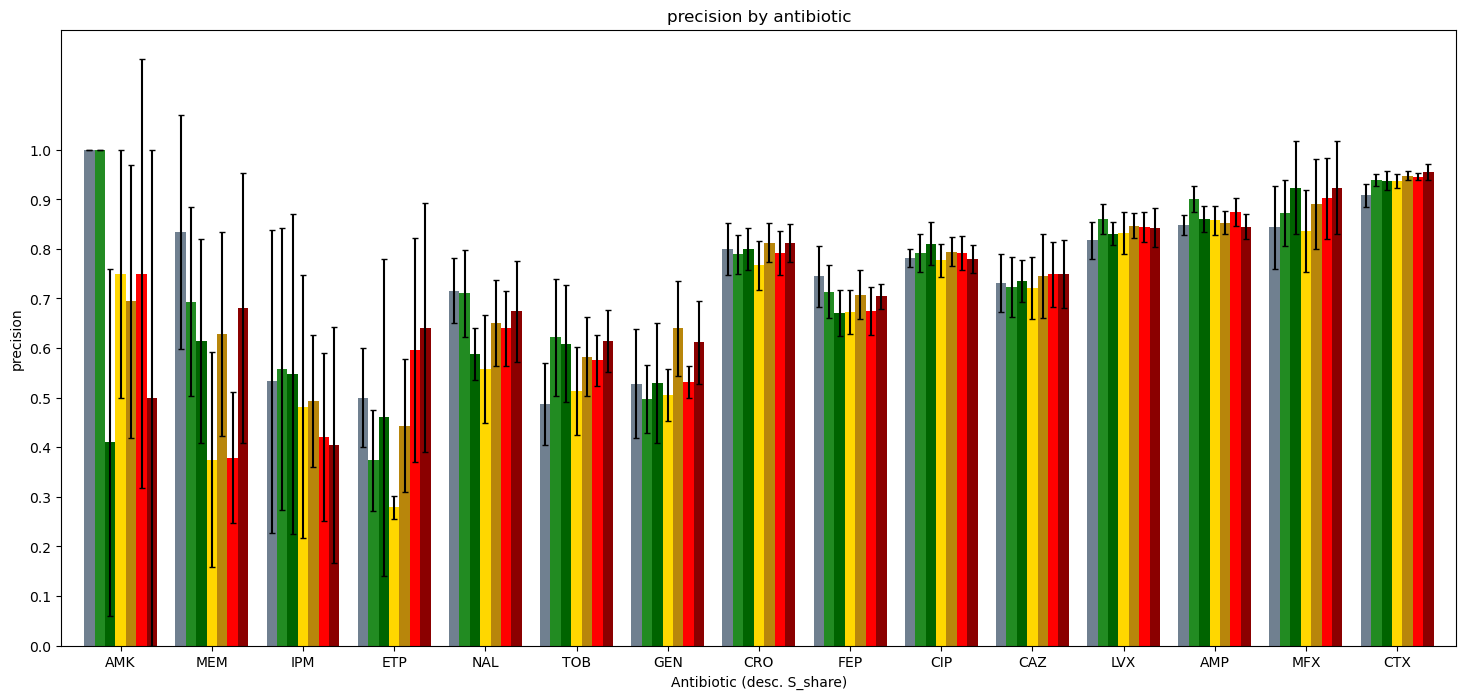

In [96]:
plot_metric_by_ab(
    df_CV_ab,
    metric='precision',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

10%

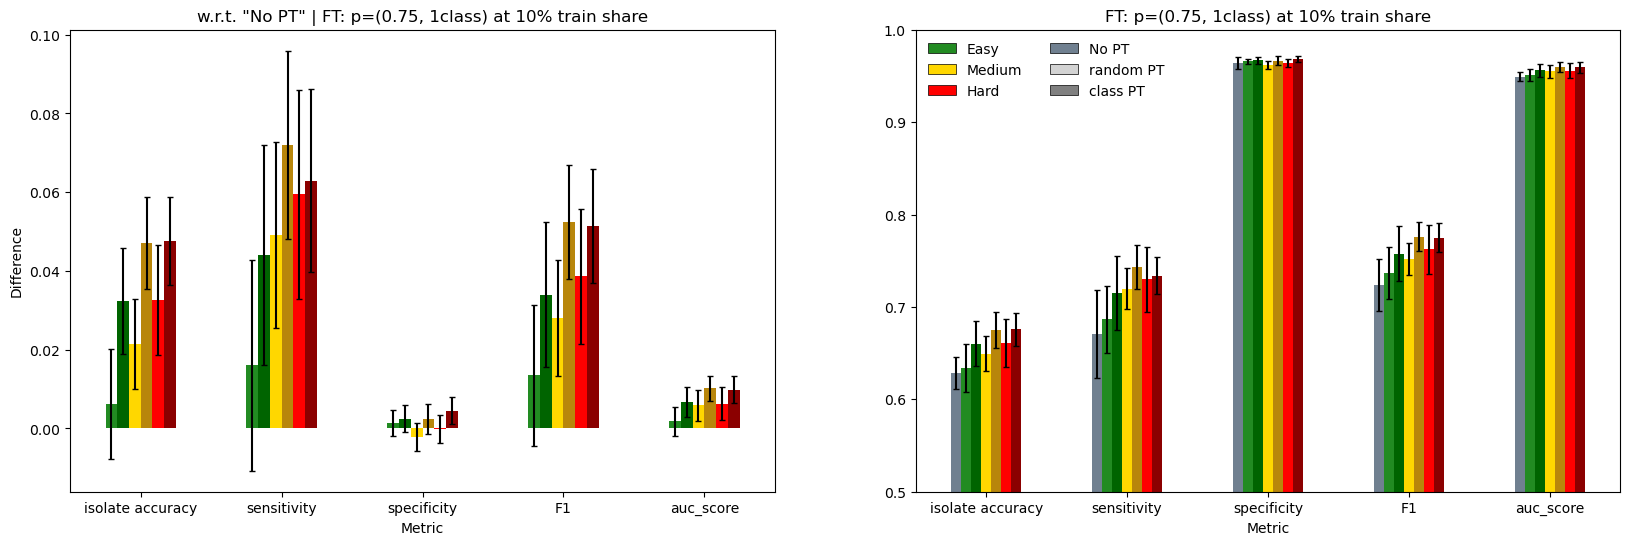

In [97]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs(train_params, '0.1', exp_folder=exp_folder)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=('+train_params.replace('_', ', ')+') at 10% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=('+train_params.replace('_', ', ')+') at 10% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.1.png')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()

30%

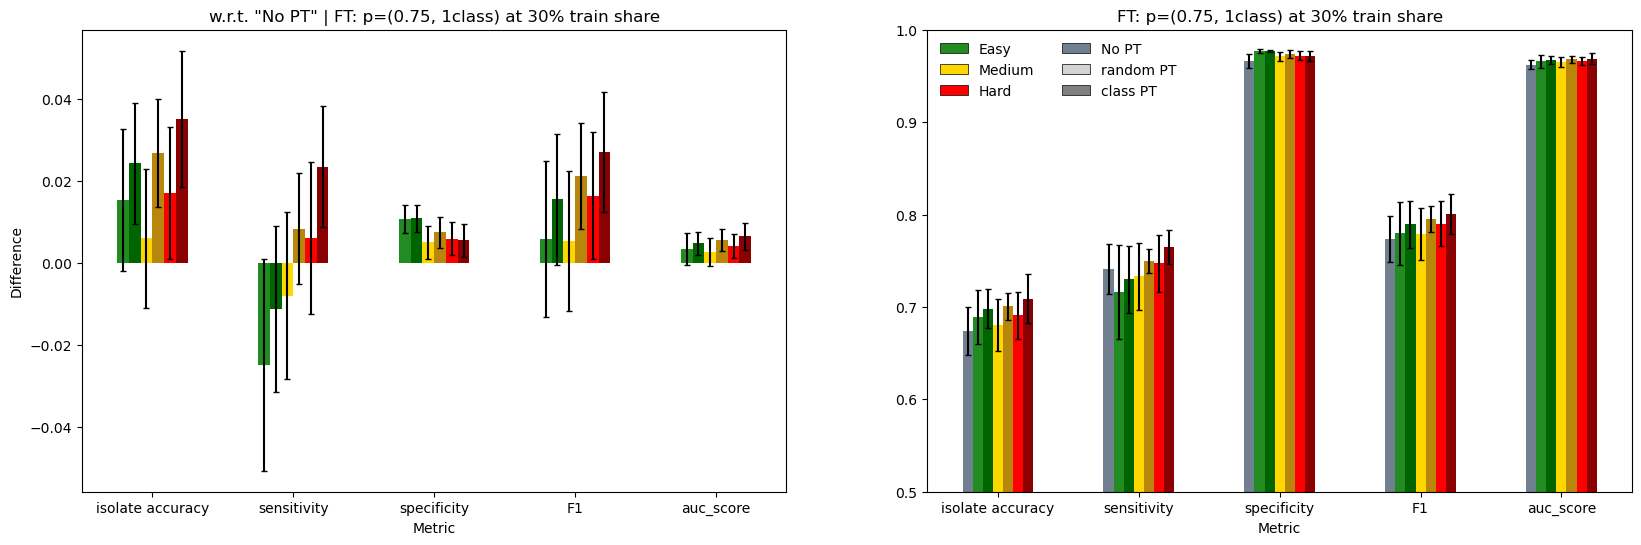

In [98]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_dfs(train_params, '0.3', exp_folder=exp_folder)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=('+train_params.replace('_', ', ')+') at 30% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.drop(drop_metrics).plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='slategray', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='grey', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=('+train_params.replace('_', ', ')+') at 30% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.3.png')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()

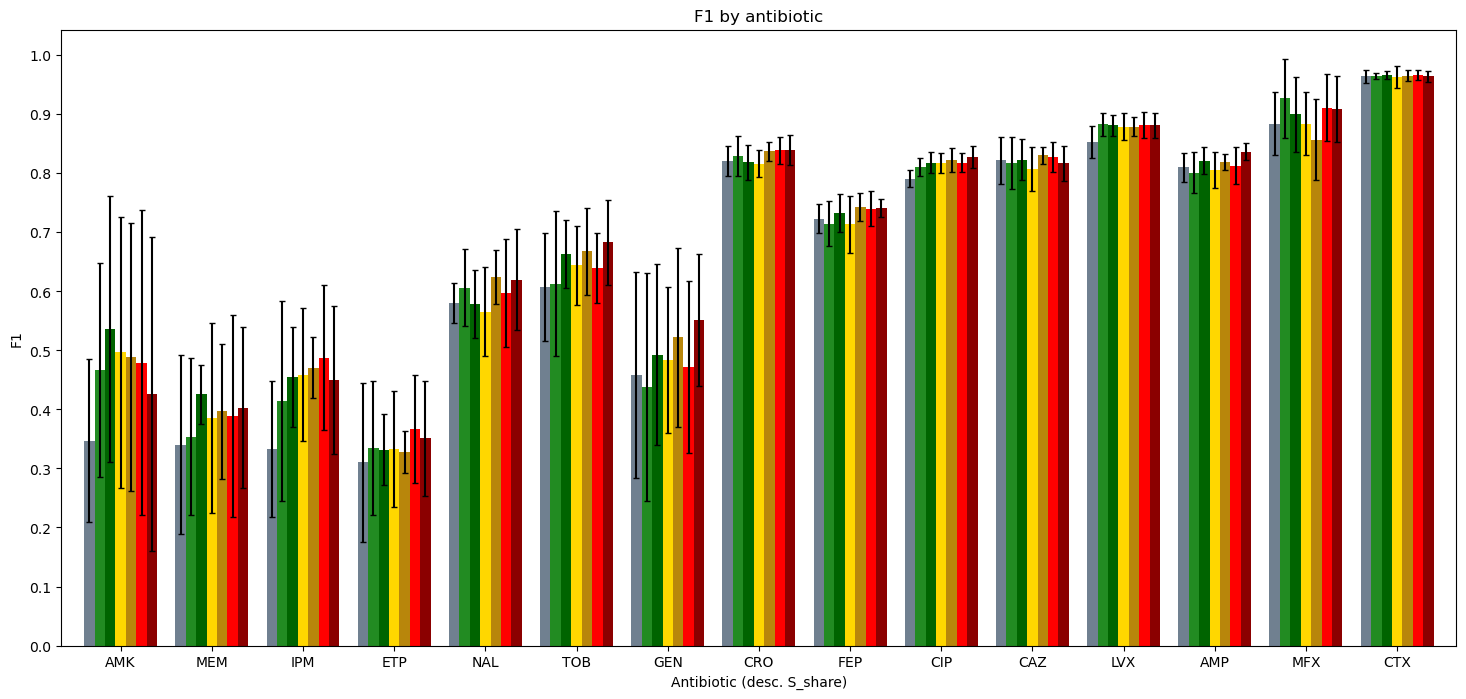

In [99]:
df_CV_ab = load_and_create_ab_df(train_params, train_share='0.3', exp_folder=exp_folder)
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)

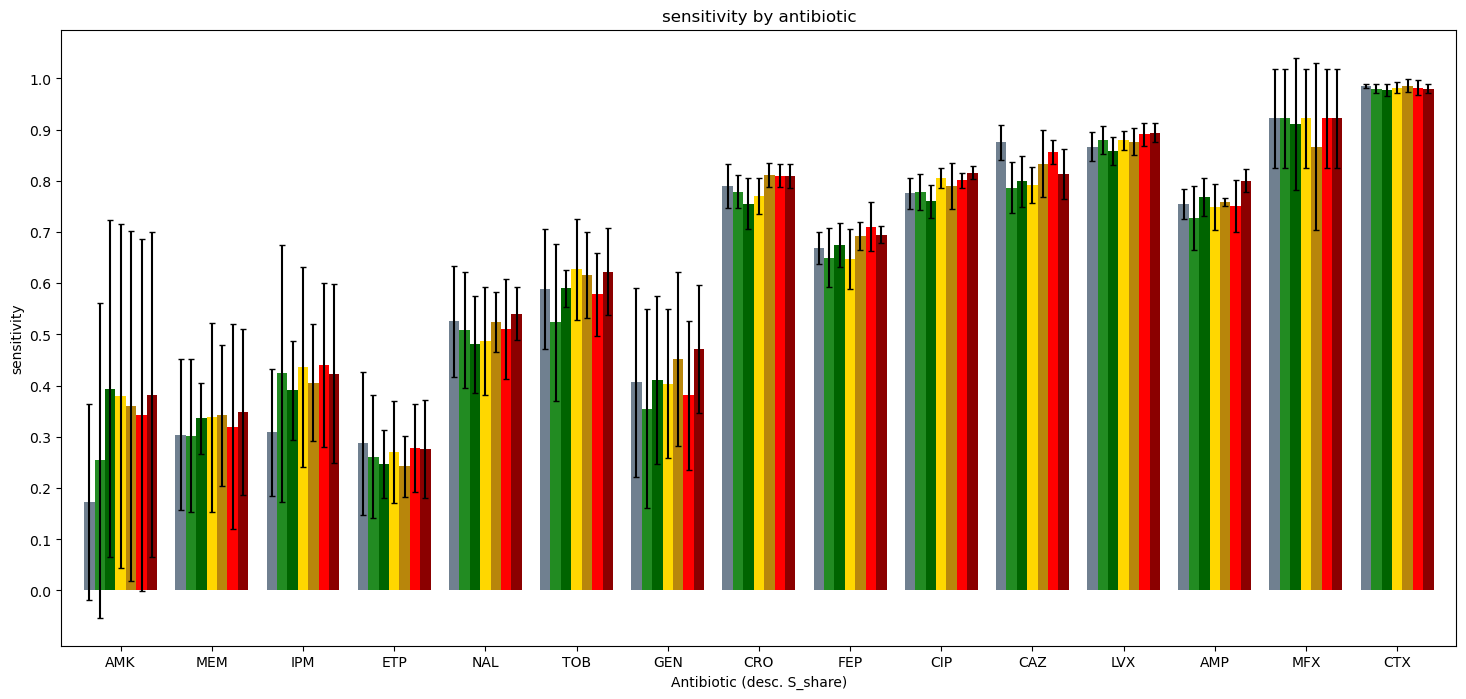

In [100]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(18, 8),
    sort_by_desc='S_share',
    use_legend=False,
)